In [1030]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import mean_absolute_error
from scipy.optimize import curve_fit
# 19n0년도의 n을 입력하면 그 19n0년도의 데이터가 하나의 데이터프레임에 저장된다.

def make_df(n): # n0년도 별로 데이터프레임 가져와서 10년끼리 묶기
    df=pd.read_csv(r".\data\df%d0.csv"%n)
    dumlist=[pd.read_csv(r".\data\df%d%d.csv"%(n,i)) for i in range(1,10)]
    for i in dumlist:
        df=pd.concat([df,i])
    return df.reset_index(drop=True)

In [1031]:
def decade_avg(x): # 10년 평균
    return np.sum(x)/10
def l_mean(x):#리스트x를 입력하면 x의 모든 숫자에 로그(ln)이 취해진다. 이에 대한 평균을 출력
    if 0 in x:
        x=np.array(x)
        arr=np.where(x==0)
        x=np.delete(x,arr)
    else:pass
    return sum(np.log10(x))/len(x)

def least(x,y): #리스트 x,y를 입력하면 x와 y를 로그 취하여 최소제곱법으로 해당 계수를 출력한다.
    if 0 in y:
        y=np.array(y)
        x=np.array(x)
        arr=np.where(y==0)
        y=np.delete(y,arr)
        x=np.delete(x,arr)
    else:pass
    a_1=sum(np.log10(y)*np.log10(x))-l_mean(y)*sum(np.log10(x))
    det=sum(np.log10(x)**2)-l_mean(x)*sum(np.log10(x))
    b_1=l_mean(y)*sum(np.log10(x)**2)-l_mean(x)*sum(np.log10(x)*np.log10(y))
    a=a_1/det
    b=b_1/det
    return a,b 

def deter(x,y): #power law 결정계수
    if 0 in y:
        y=np.array(y)
        x=np.array(x)
        arr=np.where(y==0)
        y=np.delete(y,arr)
        x=np.delete(x,arr)
    else:pass

    lx=np.log10(x)
    ly=np.log10(y)
    u_1=sum(lx*ly)
    u_2=sum(lx)*sum(ly)*(1/len(x))
    u=np.power(u_1-u_2,2)
    d_1=sum(np.power(lx,2))-np.power(sum(lx),2)*(1/len(x))
    d_2=sum(np.power(ly,2))-np.power(sum(ly),2)*(1/len(y))
    d=d_1*d_2
    return u/d

def predict(a,b,x): #least함수에서 구한 계수와 독립변수의 데이터를 입력하면 예측되는 그래프 출력
    pre=np.power(x,a)*np.power(10,b)
    return pre 

def func(k,k0,a):
    return np.power((k+k0),-a)

### 파일 불러오기


In [3]:
df70=make_df(7)
df80=make_df(8)
df90=make_df(9)
df70=df70.loc[(df70["importer"]!="World")&(df70["exporter"]!="World")].copy().reset_index(drop=True)
df80=df80.loc[(df80["importer"]!="World")&(df80["exporter"]!="World")].copy().reset_index(drop=True)
df90=df90.loc[(df90["importer"]!="World")&(df90["exporter"]!="World")].copy().reset_index(drop=True)

C:\Users\hyde2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


결측치확인

1990년도 sitc4에 6개의 결측치
- 1994~1999년까지 China HK SAR이 미국으로 수출한 물품에 결측치 발생

In [86]:
"""
연도별 각 importer와 exporter의 국가코드와 국가이름 매칭

df70["icode"]=df70["icode"].astype(str)
df70["ecode"]=df70["ecode"].astype(str)
df70["i_i"]=df70.apply(lambda x: "-".join([x["icode"],x["importer"]]),axis=1)
df70["e_e"]=df70.apply(lambda x: "-".join([x["ecode"],x["exporter"]]),axis=1)

importer_list_70=[{"icode":i.split("-")[0], "importer":i.split("-")[1]} for i in df70["i_i"].unique()]
importer_list_70=pd.DataFrame(importer_list_70)
importer_list_70.to_csv("import_list_70.csv")

exporter_list_70=[{"ecode":i.split("-")[0], "emporter":i.split("-")[1]} for i in df70["e_e"].unique()]
exporter_list_70=pd.DataFrame(exporter_list_70)
exporter_list_70.to_csv("export_list_70.csv")

df80["icode"]=df80["icode"].astype(str)
df80["ecode"]=df80["ecode"].astype(str)
df80["i_i"]=df80.apply(lambda x: "-".join([x["icode"],x["importer"]]),axis=1)
df80["e_e"]=df80.apply(lambda x: "-".join([x["ecode"],x["exporter"]]),axis=1)

importer_list_80=[{"icode":i.split("-")[0], "importer":i.split("-")[1]} for i in df80["i_i"].unique()]
importer_list_80=pd.DataFrame(importer_list_80)
importer_list_80.to_csv("import_list_80.csv")

exporter_list_80=[{"ecode":i.split("-")[0], "emporter":i.split("-")[1]} for i in df80["e_e"].unique()]
exporter_list_80=pd.DataFrame(exporter_list_80)
exporter_list_80.to_csv("export_list_80.csv")

df90["icode"]=df90["icode"].astype(str)
df90["ecode"]=df90["ecode"].astype(str)
df90["i_i"]=df90.apply(lambda x: "-".join([x["icode"],x["importer"]]),axis=1)
df90["e_e"]=df90.apply(lambda x: "-".join([x["ecode"],x["exporter"]]),axis=1)

importer_list_90=[{"icode":i.split("-")[0], "importer":i.split("-")[1]} for i in df90["i_i"].unique()]
importer_list_90=pd.DataFrame(importer_list_90)
importer_list_90.to_csv("import_list_90.csv")

exporter_list_90=[{"ecode":i.split("-")[0], "emporter":i.split("-")[1]} for i in df90["e_e"].unique()]
exporter_list_90=pd.DataFrame(exporter_list_90)
exporter_list_90.to_csv("export_list_90.csv")

"""

'\n연도별 각 importer와 exporter의 국가코드와 국가이름 매칭\n\ndf70["icode"]=df70["icode"].astype(str)\ndf70["ecode"]=df70["ecode"].astype(str)\ndf70["i_i"]=df70.apply(lambda x: "-".join([x["icode"],x["importer"]]),axis=1)\ndf70["e_e"]=df70.apply(lambda x: "-".join([x["ecode"],x["exporter"]]),axis=1)\n\nimporter_list_70=[{"icode":i.split("-")[0], "importer":i.split("-")[1]} for i in df70["i_i"].unique()]\nimporter_list_70=pd.DataFrame(importer_list_70)\nimporter_list_70.to_csv("import_list_70.csv")\n\nexporter_list_70=[{"ecode":i.split("-")[0], "emporter":i.split("-")[1]} for i in df70["e_e"].unique()]\nexporter_list_70=pd.DataFrame(exporter_list_70)\nexporter_list_70.to_csv("export_list_70.csv")\n\ndf80["icode"]=df80["icode"].astype(str)\ndf80["ecode"]=df80["ecode"].astype(str)\ndf80["i_i"]=df80.apply(lambda x: "-".join([x["icode"],x["importer"]]),axis=1)\ndf80["e_e"]=df80.apply(lambda x: "-".join([x["ecode"],x["exporter"]]),axis=1)\n\nimporter_list_80=[{"icode":i.split("-")[0], "importer":i.split("-"

In [107]:
import_country_code70=pd.read_csv(r"data\import_list_70.csv",usecols=[1,2])
export_country_code70=pd.read_csv(r"data\export_list_70.csv",usecols=[1,2])

import_country_code80=pd.read_csv(r"data\import_list_80.csv",usecols=[1,2])
export_country_code80=pd.read_csv(r"data\export_list_80.csv",usecols=[1,2])

import_country_code90=pd.read_csv(r"data\import_list_90.csv",usecols=[1,2])
export_country_code90=pd.read_csv(r"data\export_list_90.csv",usecols=[1,2])


In [126]:
export_country_code70.tail()

,ecode,emporter
158,728882,Samoa
159,445360,Neutral Zone
160,722960,Kiribati
161,360800,Br.Antr.Terr
162,450500,Bangladesh


In [129]:
country70={import_country_code70.loc[i, "icode"]:import_country_code70.loc[i, "importer"] for i in range(import_country_code70.shape[0]) }
country70={export_country_code70.loc[i, "ecode"]:export_country_code70.loc[i, "emporter"] for i in range(export_country_code70.shape[0]) }

country80={import_country_code80.loc[i, "icode"]:import_country_code80.loc[i, "importer"] for i in range(import_country_code80.shape[0]) }
country80={export_country_code80.loc[i, "ecode"]:export_country_code80.loc[i, "emporter"] for i in range(export_country_code80.shape[0]) }

country90={import_country_code90.loc[i, "icode"]:import_country_code90.loc[i, "importer"] for i in range(import_country_code90.shape[0]) }
country90={export_country_code90.loc[i, "ecode"]:export_country_code90.loc[i, "emporter"] for i in range(export_country_code90.shape[0]) }

In [5]:
df70=df70[["year","icode","ecode","sitc4","value"]]
df80=df80[["year","icode","ecode","sitc4","value"]]
df90=df90[["year","icode","ecode","sitc4","value"]]

In [6]:
for i in df70.columns:
    print("year:1970",i,df70[i].isna().sum())
    print("year:1980",i,df80[i].isna().sum())
    print("year:1990",i,df90[i].isna().sum())

year:1970 year 0
year:1980 year 0
year:1990 year 0
year:1970 icode 0
year:1980 icode 0
year:1990 icode 0
year:1970 ecode 0
year:1980 ecode 0
year:1990 ecode 0
year:1970 sitc4 0
year:1980 sitc4 0
year:1990 sitc4 6
year:1970 value 0
year:1980 value 0
year:1990 value 0


SITC-4분류의 앞자리 기입하기. 

In [7]:
df70["sitc4"]=df70["sitc4"].map(lambda x: "{0:0>4}".format(x))
df80["sitc4"]=df80["sitc4"].map(lambda x: "{0:0>4}".format(x))
df90["sitc4"]=df90["sitc4"].map(lambda x: "{0:0>4}".format(x))

In [8]:
df70["sitc4_f"]=df70["sitc4"].map(lambda x: x[0])
df80["sitc4_f"]=df80["sitc4"].map(lambda x: x[0])
df90["sitc4_f"]=df90["sitc4"].map(lambda x: x[0])

국가수

In [9]:
countrylst_70=df70["icode"].unique().tolist()
countrylst_80=df80["icode"].unique().tolist()
countrylst_90=df90["icode"].unique().tolist()
countrylst_70.extend(df70["ecode"].unique().tolist())
countrylst_80.extend(df80["ecode"].unique().tolist())
countrylst_90.extend(df90["ecode"].unique().tolist())

In [10]:
countrylst_70=list(set(countrylst_70)) # 1970년대의 총 국가 
countrylst_80=list(set(countrylst_80)) # 1980년대의 총 국가
countrylst_90=list(set(countrylst_90)) # 1990년대의 총 국가

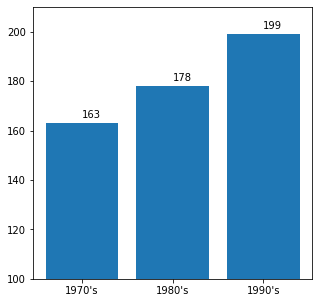

In [11]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(0,3),(len(countrylst_70),len(countrylst_80),len(countrylst_90)))
for i,j,k in zip(np.arange(0,3),(len(countrylst_70),len(countrylst_80),len(countrylst_90)),(str(len(countrylst_70)),str(len(countrylst_80)),str(len(countrylst_90)))):
    plt.text(i,j+2,k)
plt.xticks(np.arange(0,3),["1970's","1980's","1990's"])
plt.ylim(100,210)
plt.show()

In [571]:
df70.head()

,year,icode,ecode,sitc4,value,sitc4_f
0,1970,117100,138180,0620,1,0
1,1970,117100,141400,2472,22,2
2,1970,117100,141400,2483,149,2
3,1970,117100,141780,2472,278,2
4,1970,117100,141780,2483,174,2


In [14]:
# 각국이 (70년대, 80년대, 90년대* sitc4 첫글자(0~9))몇개의 나라에 수출하였는지 기입하기
country_df70=df70[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()
country_df80=df80[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()
country_df90=df90[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()

# 컬럼이름 바꿔주기, ecode가 수출한 국가(icode)의 수를 out_degree로 표기
country_df70.columns=["year","ecode","sitc4_f","out_degree"]
country_df80.columns=["year","ecode","sitc4_f","out_degree"]
country_df90.columns=["year","ecode","sitc4_f","out_degree"]

# 리스트 df70_outdegree의 인덱스 번호를 SITC-4 앞자리의 번호로 하여서 분류해놓는다. 
df70_outdegree=[country_df70.loc[country_df70["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
df80_outdegree=[country_df80.loc[country_df80["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
df90_outdegree=[country_df90.loc[country_df90["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]

# 각국의 10년 간 수출국 수의 평균을 구한다. 
df70_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df70_outdegree]
df80_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df80_outdegree]
df90_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df90_outdegree]

In [15]:
df70_std=[df["out_degree"].std() for df in df70_avg_out]
df80_std=[df["out_degree"].std() for df in df80_avg_out]
df90_std=[df["out_degree"].std() for df in df90_avg_out]

df70_m=[df["out_degree"].mean() for df in df70_avg_out]
df80_m=[df["out_degree"].mean() for df in df80_avg_out]
df90_m=[df["out_degree"].mean() for df in df90_avg_out]

In [16]:
df_std_m=pd.DataFrame(data={"70s_mean":df70_m,"70s_std":df70_std,"80s_mean":df80_m,"80s_std":df80_std,
                            "90s_mean":df90_m,"90s_std":df90_std})

In [17]:
df_std_m=df_std_m.T

In [18]:
df_ratio=df_std_m.loc[["70s_std","80s_std","90s_std"],]/df_std_m.loc[["70s_std","80s_std","90s_std"],]

In [19]:
df_std=df_std_m.loc[["70s_std","80s_std","90s_std"],].copy().reset_index(drop=True)
df_mean=df_std_m.loc[["70s_mean","80s_mean","90s_mean"],].copy().reset_index(drop=True)

In [20]:
df_std.columns=["%d_std"%i for i in range(0,10)]
df_mean.columns=["%d_mean"%i for i in range(0,10)]

df_std["index"]=["%ds"%i for i in (70,80,90)]
df_mean["index"]=["%ds"%i for i in (70,80,90)]

In [21]:
df_std.set_index("index",inplace=True)
df_mean.set_index("index",inplace=True)

In [22]:
df_static=pd.concat([df_std, df_mean],axis=1)

In [23]:
i=1
df_static[["%d_std"%i,"%d_mean"%i]]

,1_std,1_mean
index,,
70s,34.559623,25.539130
80s,26.984721,17.533333
90s,27.559891,17.111798


In [24]:
mean_edge80=[]
new_edge80=[]

new_node80=list(set(countrylst_80)-set(countrylst_70))
new_edge80=[df80.loc[(df80["icode"].isin(new_node80))&(df80["sitc4_f"]=="%d"%i),"ecode"].unique() for i in range(0,10)]#새로운 노드들이 연결한 노드들
for i in range(0,10):
    mean_edge80.append(df80_avg_out[i].loc[df80_avg_out[i]["ecode"].isin(new_edge80[i]),"out_degree"].mean())

In [25]:
mean_edge90=[]
new_edge90=[]

new_node90=list(set(countrylst_90)-set(countrylst_80))
new_edge90=[df90.loc[(df90["icode"].isin(new_node90))&(df90["sitc4_f"]=="%d"%i),"ecode"].unique() for i in range(0,10)]#새로운 노드들이 연결한 노드들
for i in range(0,10):
    mean_edge90.append(df90_avg_out[i].loc[df90_avg_out[i]["ecode"].isin(new_edge90[i]),"out_degree"].mean())

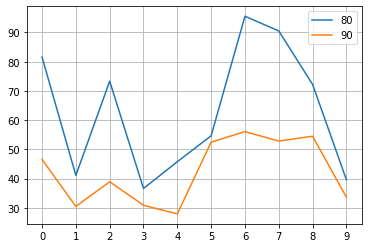

In [26]:
plt.plot(mean_edge80,label="80")
plt.plot(mean_edge90, label="90")
plt.xticks(np.arange(0,10))

plt.grid()
plt.legend()
plt.show()

In [27]:
df_static["0_rat"]=df_static["0_std"]/df_static["0_mean"]
df_static["1_rat"]=df_static["1_std"]/df_static["1_mean"]
df_static["2_rat"]=df_static["2_std"]/df_static["2_mean"]
df_static["3_rat"]=df_static["3_std"]/df_static["3_mean"]
df_static["4_rat"]=df_static["4_std"]/df_static["4_mean"]
df_static["5_rat"]=df_static["5_std"]/df_static["5_mean"]
df_static["6_rat"]=df_static["6_std"]/df_static["6_mean"]
df_static["7_rat"]=df_static["7_std"]/df_static["7_mean"]
df_static["8_rat"]=df_static["8_std"]/df_static["8_mean"]
df_static["9_rat"]=df_static["9_std"]/df_static["9_mean"]

<Figure size 1008x720 with 0 Axes>

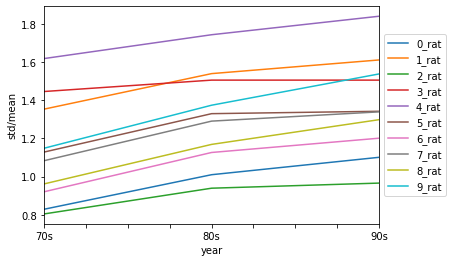

In [28]:
plt.figure(figsize=(14,10))
df_static[["%d_rat"%i for i in range(0,10)]].plot()
plt.ylabel("std/mean")
plt.xlabel("year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r"ratio.png")

out degree distribution #q=[(bins[i+1]-bins[i])*y[0][i] for i in range(len(y_))]

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


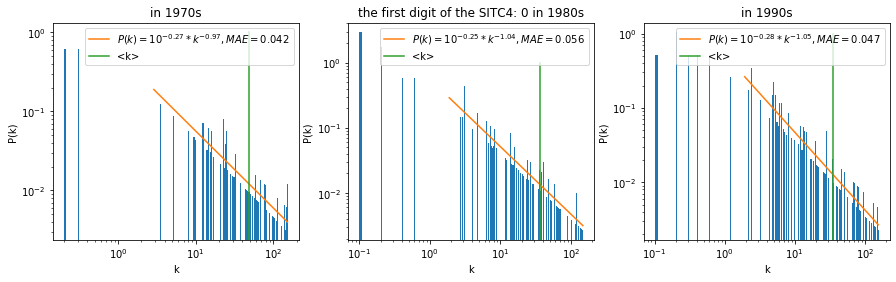

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


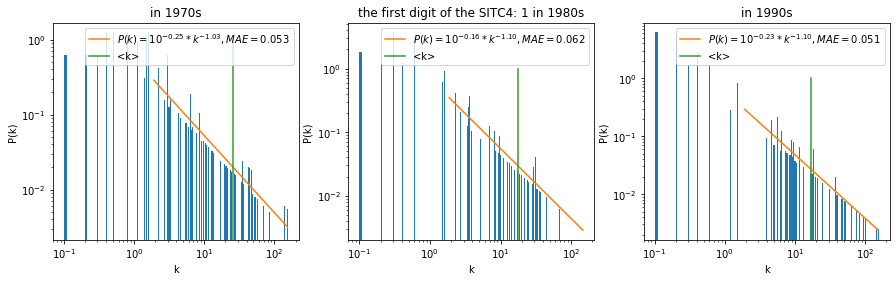

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


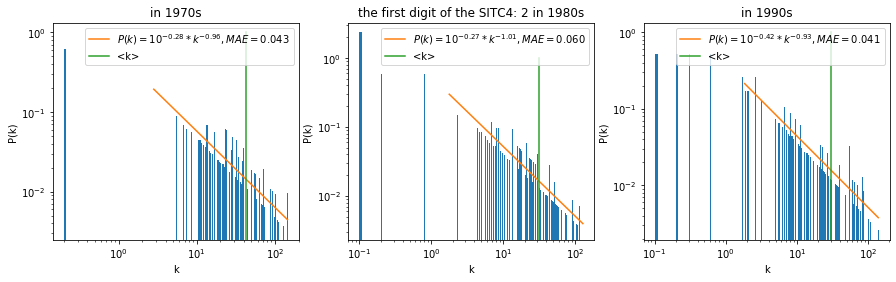

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


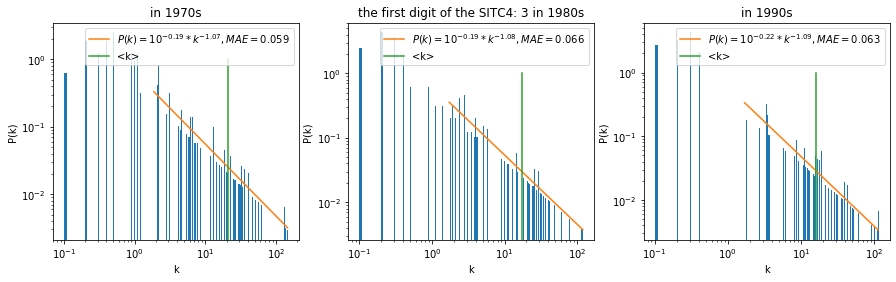

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


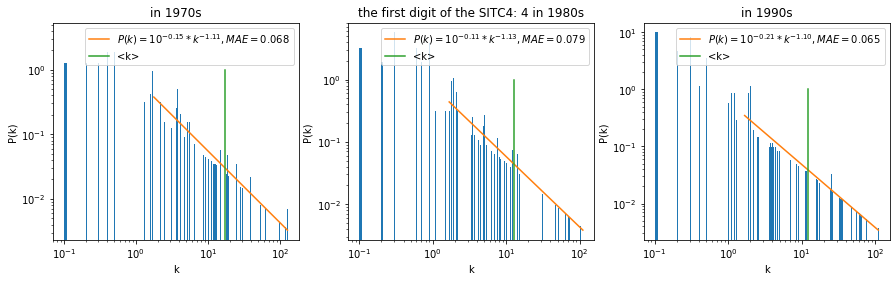

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


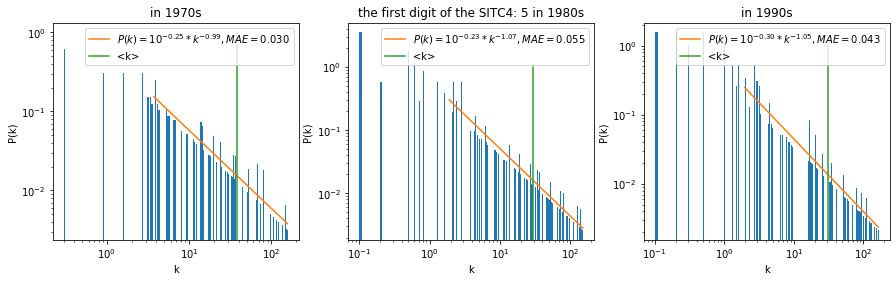

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


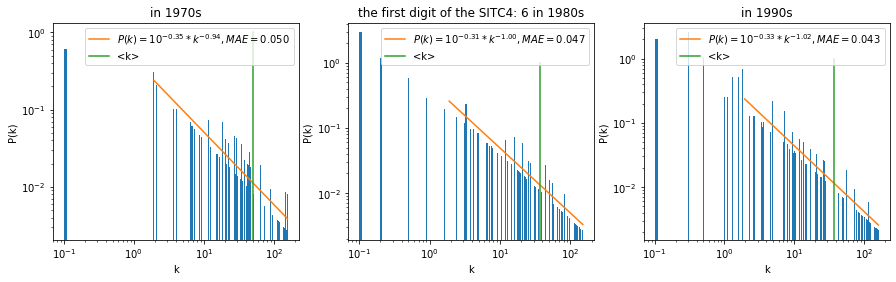

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


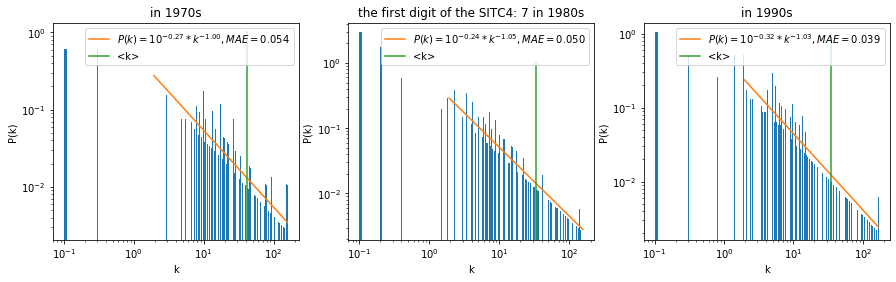

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


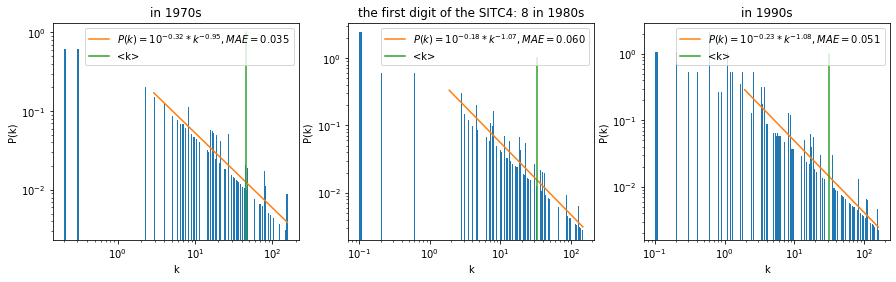

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


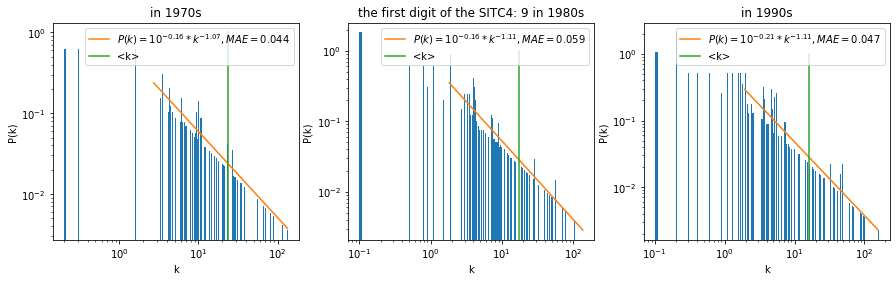

In [1335]:
upper_70, upper_80 ,upper_90 = 200,200,200
cut70, cut80, cut90 = 500,500,500
a70,a80,a90=[],[],[]
kmean70,kmean80,kmean90=[],[],[]
kmax70,kmax80,kmax90=[],[],[]
kmin70,kmin80,kmin90=[],[],[]
mae70,mae80,mae90=[],[],[]
for i in range(0,10):
    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    bins=np.round(np.logspace(np.log10(df70_avg_out[i]["out_degree"].min()),np.log10(df70_avg_out[i]["out_degree"].max()),endpoint=True,num=cut70),2).tolist()
    y=plt.hist(df70_avg_out[i]["out_degree"],bins=bins,density=True)# u[1] bins
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_70:],y[0][upper_70:])
    a70.append(a)
    kmax70.append(df70_avg_out[i]["out_degree"].max())
    kmin70.append(df70_avg_out[i]["out_degree"].min())
    kmean70.append(df70_avg_out[i]["out_degree"].mean())
    mae70.append(mean_absolute_error(y[0][upper_70:],pred))
    pred=predict(a,b,x_[upper_70:])

    plt.plot(x_[upper_70:], pred, label=r"$P(k)=10^{%.2f}*k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y[0][upper_70:],pred)))
    plt.plot([df70_avg_out[i]["out_degree"].mean(),df70_avg_out[i]["out_degree"].mean()],[10^-3,1],label="<k>")
    plt.legend()
    plt.title("in 1970s")
    #plt.text(df70_avg_out[i]["out_degree"].max()-100,0.005,"1970-%d"%i,fontsize=20)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"P(k)")
    plt.xlabel("k")


    plt.subplot(1,3,2)
    bins=np.round(np.logspace(np.log10(df80_avg_out[i]["out_degree"].min()),np.log10(df80_avg_out[i]["out_degree"].max()),endpoint=True,num=cut80),2).tolist()
    y=plt.hist(df80_avg_out[i]["out_degree"],bins=bins,density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_80:],y[0][upper_80:])
    pred=predict(a,b,x_[upper_80:])
    plt.plot(x_[upper_80:], pred, label=r"$P(k)=10^{%.2f}*k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y[0][upper_80:],pred)))
    plt.plot([df80_avg_out[i]["out_degree"].mean(),df80_avg_out[i]["out_degree"].mean()],[10^-3,1],label="<k>")
    a80.append(a)
    kmean80.append(df80_avg_out[i]["out_degree"].mean())
    kmax80.append(df80_avg_out[i]["out_degree"].max())
    kmin80.append(df80_avg_out[i]["out_degree"].min())
    mae80.append(mean_absolute_error(y[0][upper_80:],pred))

    plt.legend()
    plt.title("the first digit of the SITC4: %d in 1980s"%i)
    plt.ylabel(r"P(k)")
    plt.xlabel("k")
    plt.xscale("log")
    plt.yscale("log")

    plt.subplot(1,3,3)
    bins=np.round(np.logspace(np.log10(df90_avg_out[i]["out_degree"].min()),np.log10(df90_avg_out[i]["out_degree"].max()),endpoint=True,num=cut90),2).tolist()
    y_=plt.hist(df90_avg_out[i]["out_degree"],bins=bins,density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_90:],y_[0][upper_90:])
    pred=predict(a,b,x_[upper_90:])
    plt.plot(x_[upper_90:], pred, label=r"$P(k)=10^{%.2f}*k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y_[0][upper_90:],pred)))
    plt.plot([df90_avg_out[i]["out_degree"].mean(),df90_avg_out[i]["out_degree"].mean()],[10^-3,1],label="<k>")
    a90.append(a)
    kmax90.append(df90_avg_out[i]["out_degree"].max())
    kmin90.append(df90_avg_out[i]["out_degree"].min())
    kmean90.append(df90_avg_out[i]["out_degree"].mean())
    mae90.append(mean_absolute_error(y[0][upper_90:],pred))

    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel(r"P(k)")
    plt.xlabel("k")
    plt.title("in 1990s")

    plt.savefig("decade_%d.png"%i)
    plt.show()

In [1336]:
N_70,N_80,N_90=[],[],[]
for i in range(10):
    N_70.append(len(set(np.concatenate([df70.loc[df70["sitc4_f"]=="%d"%i,"ecode"].unique(),df70.loc[df70["sitc4_f"]=="%d"%i,"icode"].unique()]).tolist())))
for i in range(10):
    N_80.append(len(set(np.concatenate([df80.loc[df80["sitc4_f"]=="%d"%i,"ecode"].unique(),df80.loc[df80["sitc4_f"]=="%d"%i,"icode"].unique()]).tolist())))
for i in range(10):
    N_90.append(len(set(np.concatenate([df90.loc[df90["sitc4_f"]=="%d"%i,"ecode"].unique(),df90.loc[df90["sitc4_f"]=="%d"%i,"icode"].unique()]).tolist())))

In [1337]:
cal_70=pd.DataFrame(data={'N':N_70,"$k_{min}$":kmin70,"$k_{max}$":kmax70,"$<k>$":kmean70}, index=["sitc4: %d"%i for i in range(0,10)])
cal_80=pd.DataFrame(data={'N':N_80,"$k_{min}$":kmin80,"$k_{max}$":kmax80,"$<k>$":kmean80}, index=["sitc4: %d"%i for i in range(0,10)])
cal_90=pd.DataFrame(data={'N':N_90,"$k_{min}$":kmin90,"$k_{max}$":kmax90,"$<k>$":kmean90}, index=["sitc4: %d"%i for i in range(0,10)])

In [1338]:
cal_70["lnN"]=cal_70["N"].map(lambda x: np.log(x))
cal_80["lnN"]=cal_80["N"].map(lambda x: np.log(x))
cal_90["lnN"]=cal_90["N"].map(lambda x: np.log(x))

cal_70["$\gamma$"]=np.array(a70)*-1
cal_80["$\gamma$"]=np.array(a80)*-1
cal_90["$\gamma$"]=np.array(a90)*-1

cal_70["MAE"]=mae70
cal_80["MAE"]=mae80
cal_90["MAE"]=mae90

In [1339]:
cal_70['$N^{1/{\gamma-1}}$']=cal_70.apply(lambda x: np.power(x["N"],1/(x["$\gamma$"]-1)), axis=1)
cal_80['$N^{1/{\gamma-1}}$']=cal_80.apply(lambda x: np.power(x["N"],1/(x["$\gamma$"]-1)), axis=1)
cal_90['$N^{1/{\gamma-1}}$']=cal_90.apply(lambda x: np.power(x["N"],1/(x["$\gamma$"]-1)), axis=1)

In [1340]:
cal_90

,N,$k_{min}$,$k_{max}$,$<k>$,lnN,$\gamma$,MAE,$N^{1/{\gamma-1}}$
sitc4: 0,196,0.1,156.6,34.550259,5.278115,1.045047,0.050394,7.693662e+50
sitc4: 1,193,0.1,154.4,17.111798,5.262690,1.095511,0.052969,8.505642e+23
sitc4: 2,195,0.1,140.1,29.971875,5.273000,0.934374,0.045231,1.272882e-35
sitc4: 3,194,0.1,114.6,15.982447,5.267858,1.093550,0.061656,2.853827e+24
sitc4: 4,191,0.1,111.2,12.064327,5.252273,1.103381,0.067033,1.159851e+22
sitc4: 5,196,0.1,164.6,30.935751,5.278115,1.053022,0.046463,1.705297e+43
sitc4: 6,197,0.1,161.7,37.062755,5.283204,1.023243,0.041772,5.212592e+98
sitc4: 7,195,0.1,168.6,35.372917,5.273000,1.029545,0.041901,3.246134e+77
sitc4: 8,196,0.1,159.9,31.505789,5.278115,1.079405,0.051648,7.375251e+28
sitc4: 9,195,0.1,159.1,16.225789,5.273000,1.106544,0.050350,3.117331e+21


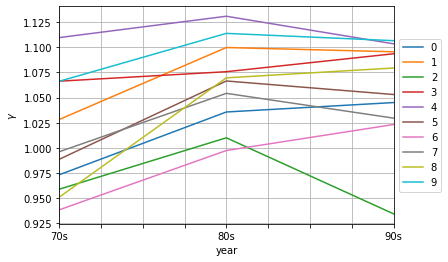

In [549]:
gamma=pd.DataFrame(data={"70s":np.array(a70)*-1,"80s":np.array(a80)*-1,"90s":np.array(a90)*-1})
gamma["mean"]=gamma.apply(lambda x: np.mean(x), axis=1)
gamma["std"]=gamma.apply(lambda x: np.std(x), axis=1)
gamma[["70s","80s","90s"]].T.plot()
plt.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r"$\gamma$")
plt.xlabel(r"year")
plt.grid()
plt.savefig('gamma_year.png')

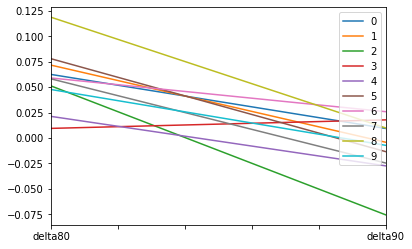

In [1152]:
pd.DataFrame(data={"delta80":gamma["80s"]-gamma["70s"],"delta90":gamma["90s"]-gamma["80s"]}).T.plot()

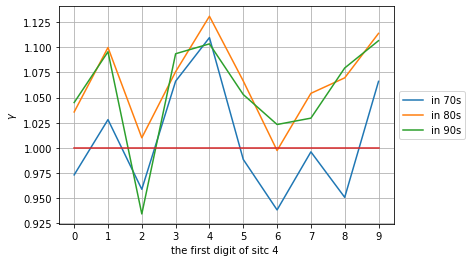

<Figure size 432x288 with 0 Axes>

In [544]:
plt.plot(np.array(a70)*-1, label="in 70s")
plt.plot(np.array(a80)*-1, label="in 80s")
plt.plot(np.array(a90)*-1, label="in 90s")

plt.plot(np.arange(0,10),np.repeat(1,10))
plt.ylabel(r"$\gamma$")
plt.xlabel("the first digit of sitc 4 ")
plt.xticks(np.arange(0,10))
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig('gamma_product.png')

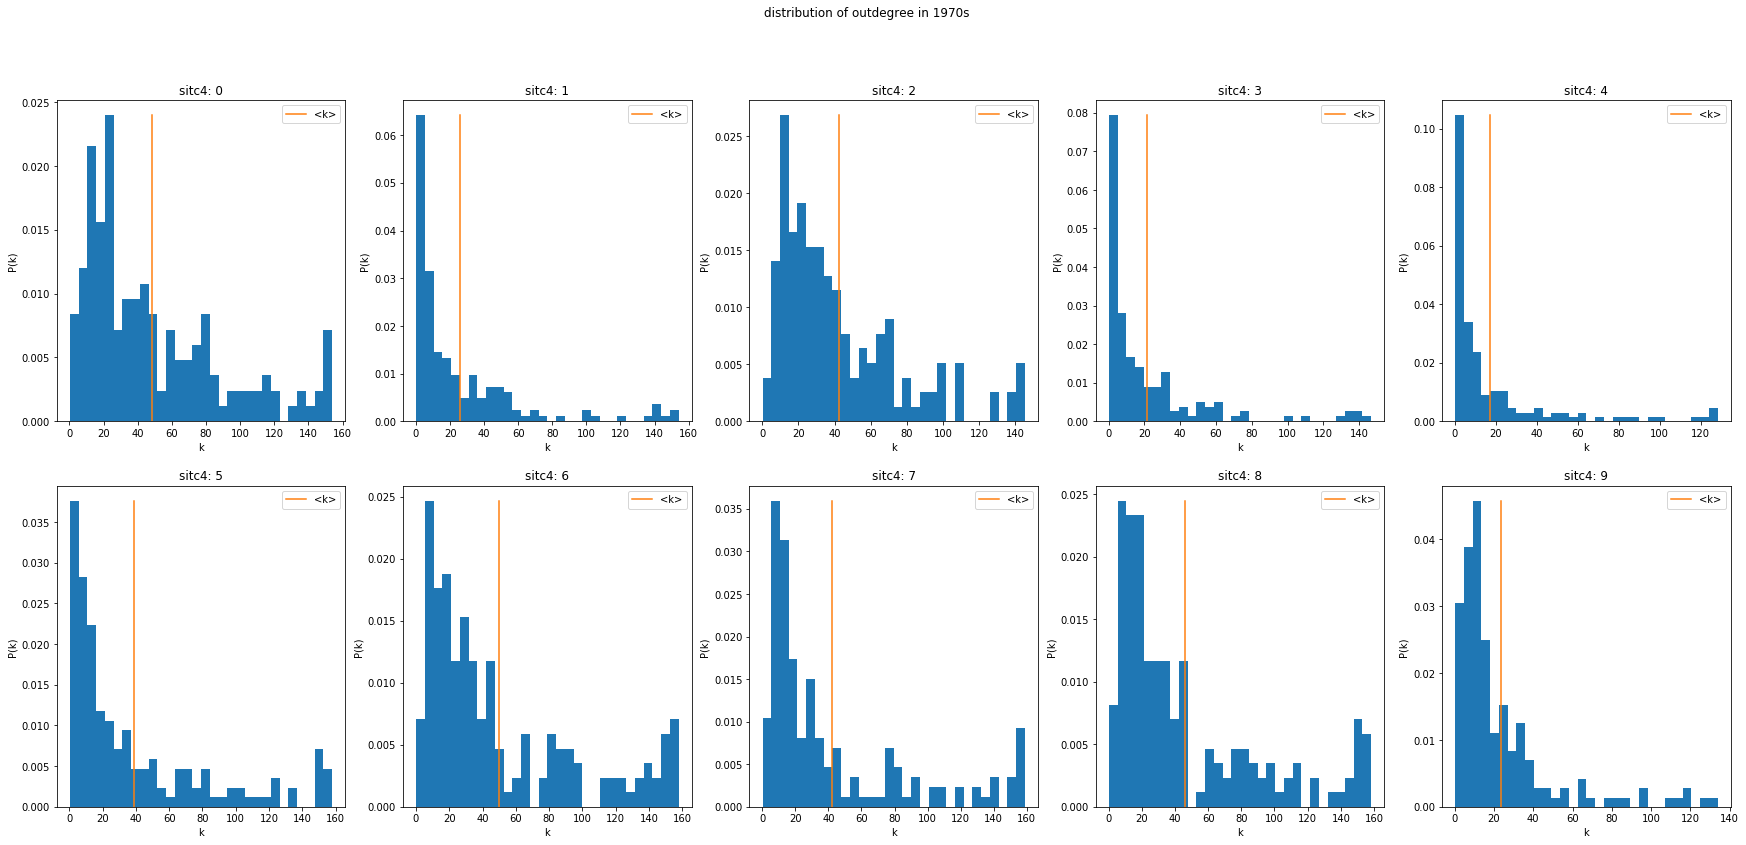

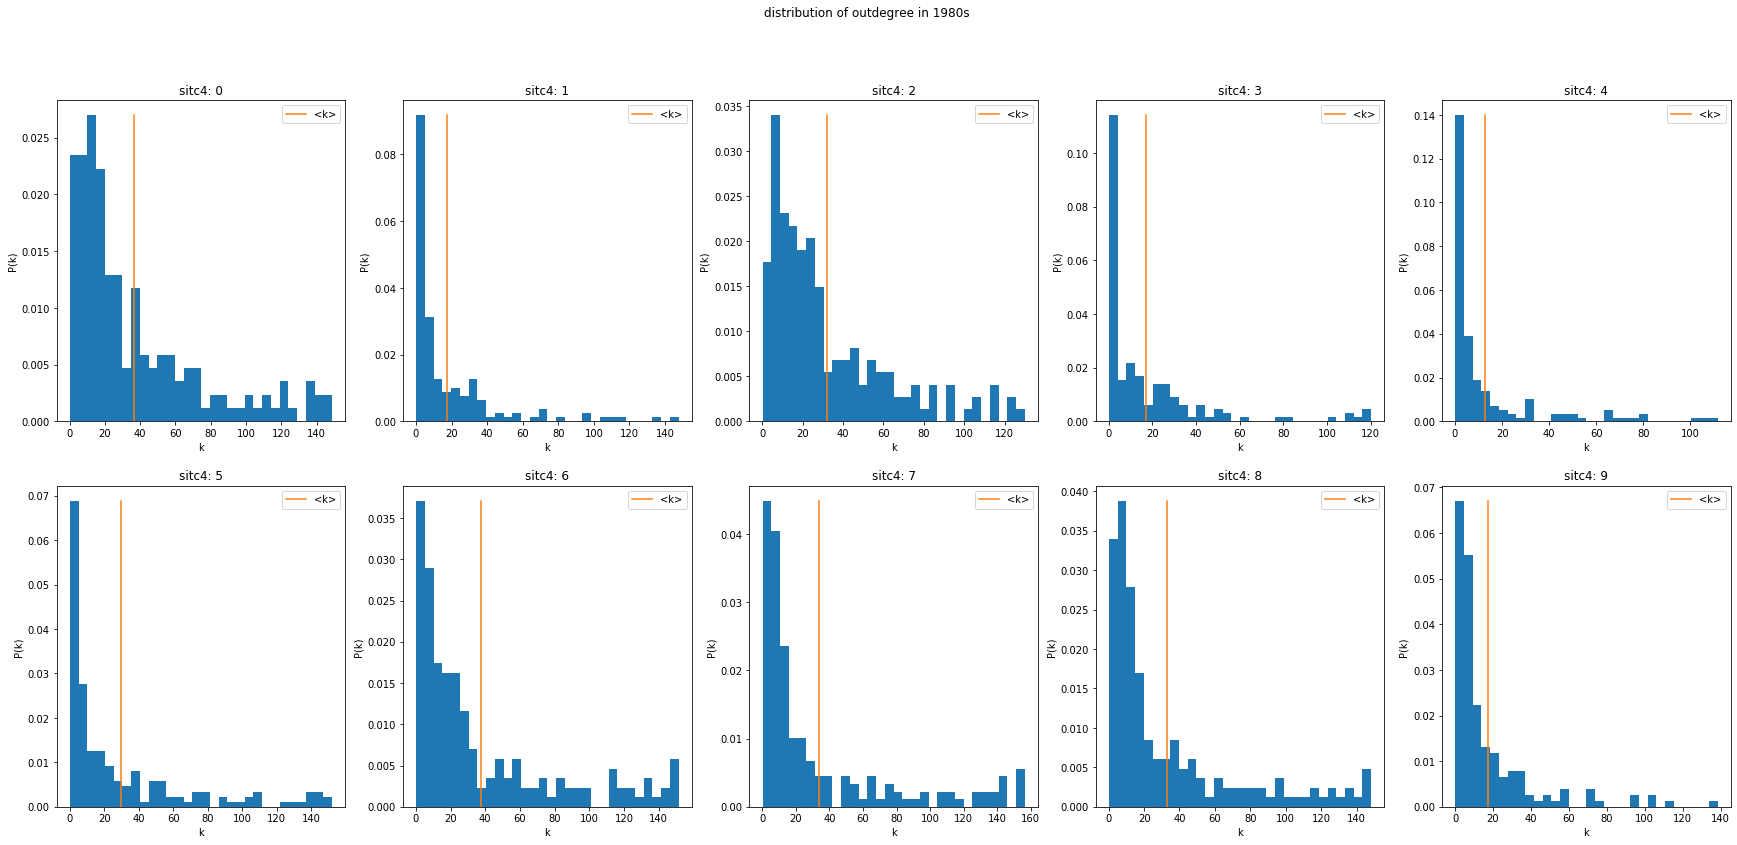

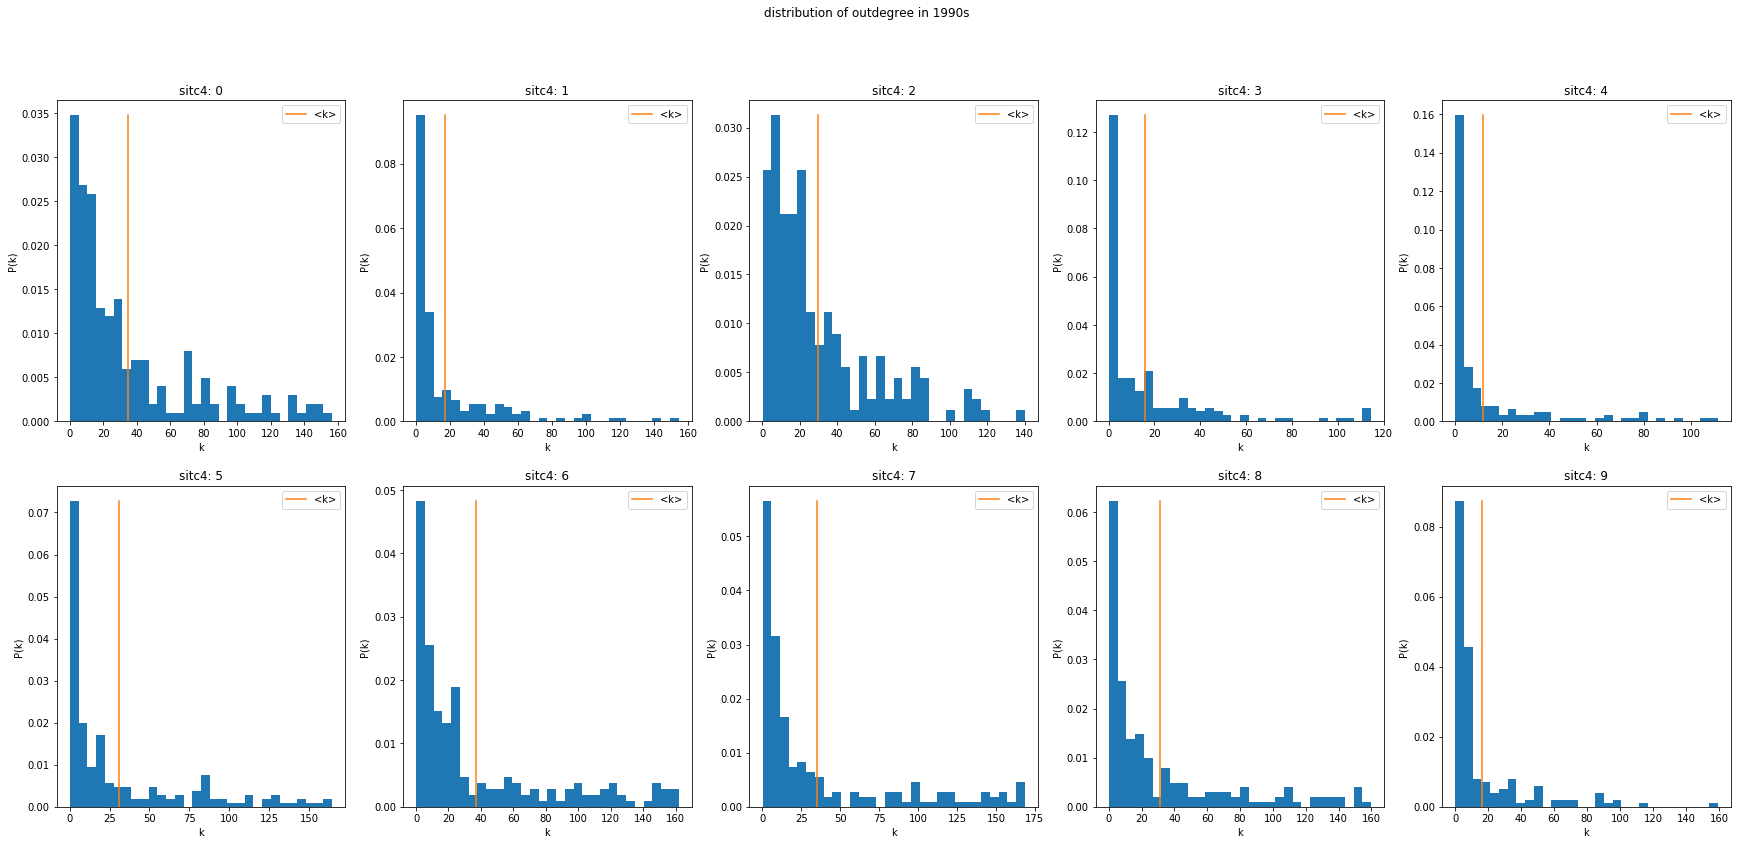

In [1275]:
plt.figure(figsize=(30,13))

for i in range(0, 10):
    plt.subplot(2,5,i+1)
    #bins=np.round(np.logspace(np.log10(df70_avg_out[i]["out_degree"].min()),np.log10(df70_avg_out[i]["out_degree"].max()),endpoint=True,num=25),2).tolist()
    #plt.hist(df70_avg_out[i]["out_degree"],bins=bins,density=True)
    y=plt.hist(df70_avg_out[i]["out_degree"],bins=30,density=True)
    #plt.text(df70_avg_out[i]["out_degree"].max()-70,0.005,"1970-%d"%i,fontsize=20)
    plt.plot([df70_avg_out[i]["out_degree"].mean(),df70_avg_out[i]["out_degree"].mean()],[0,y[0].max()],label="<k>")
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.legend()
    plt.title("sitc4: %d"%i)

    #plt.xscale("log")
    #plt.yscale("log")
    #plt.xlim(df70_avg_out[i]["out_degree"].min(),df70_avg_out[i]["out_degree"].max())
plt.suptitle("distribution of outdegree in 1970s")
plt.savefig(r".\graph\outdegree\70\linear_outdegree_70_%d.png"%i)
plt.show()

plt.figure(figsize=(30,13))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    #bins=np.round(np.logspace(np.log10(df80_avg_out[i]["out_degree"].min()),np.log10(df80_avg_out[i]["out_degree"].max()),endpoint=True,num=25),2).tolist()
#    plt.hist(df80_avg_out[i]["out_degree"],bins=bins,density=True)
    y=plt.hist(df80_avg_out[i]["out_degree"],bins=30,density=True)
#    plt.text(df70_avg_out[i]["out_degree"].max,0.5,"%d"%i)
    #plt.text(df80_avg_out[i]["out_degree"].max()-70,0.005,"1980-%d"%i,fontsize=20)
    plt.plot([df80_avg_out[i]["out_degree"].mean(),df80_avg_out[i]["out_degree"].mean()],[0,y[0].max()],label="<k>")
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.legend()
    plt.title("sitc4: %d"%i)

#    plt.xscale("log")
#    plt.yscale("log")
#    plt.xlim(df80_avg_out[i]["out_degree"].min(),df80_avg_out[i]["out_degree"].max())
plt.suptitle("distribution of outdegree in 1980s")
plt.savefig(r".\graph\outdegree\80\linear_outdegree_80_%d.png"%i)
plt.show()

plt.figure(figsize=(30,13))
for i in range(0, 10):
    plt.subplot(2,5,i+1)

#    bins=np.round(np.logspace(np.log10(df90_avg_out[i]["out_degree"].min()),np.log10(df90_avg_out[i]["out_degree"].max()),endpoint=True,num=30),2).tolist()
#    plt.hist(df90_avg_out[i]["out_degree"],bins=bins,density=True)
    y=plt.hist(df90_avg_out[i]["out_degree"],bins=30,density=True)
#    plt.text(df70_avg_out[i]["out_degree"].max,0.5,"%d"%i)
    #plt.text(df90_avg_out[i]["out_degree"].max()-70,0.005,"1990-%d"%i,fontsize=20)
    plt.plot([df90_avg_out[i]["out_degree"].mean(),df90_avg_out[i]["out_degree"].mean()],[0,y[0].max()],label="<k>")
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.legend()
    plt.title("sitc4: %d"%i)

#    plt.xscale("log")
#    plt.yscale("log")
#    plt.xlim(df90_avg_out[i]["out_degree"].min(),df90_avg_out[i]["out_degree"].max())    
plt.suptitle("distribution of outdegree in 1990s")
plt.savefig(r".\graph\outdegree\90\linear_outdegree_90_%d.png"%i)
plt.show()


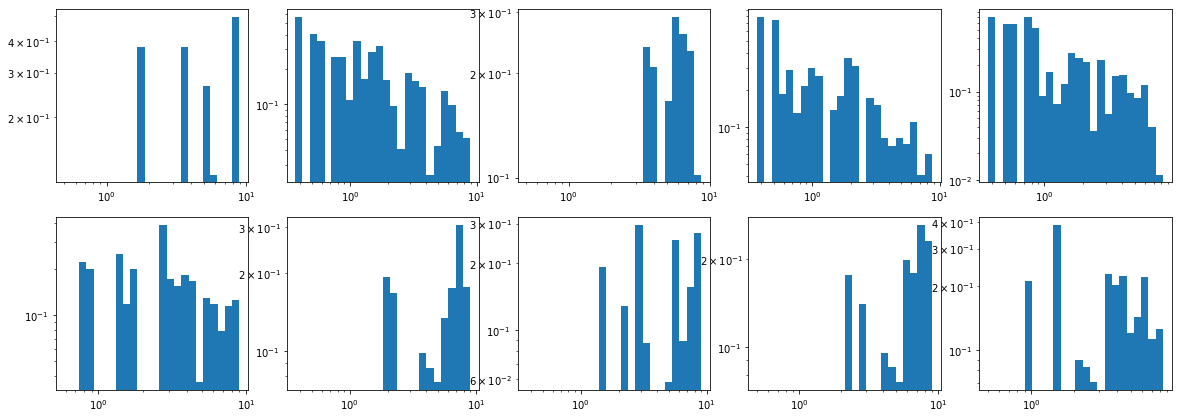

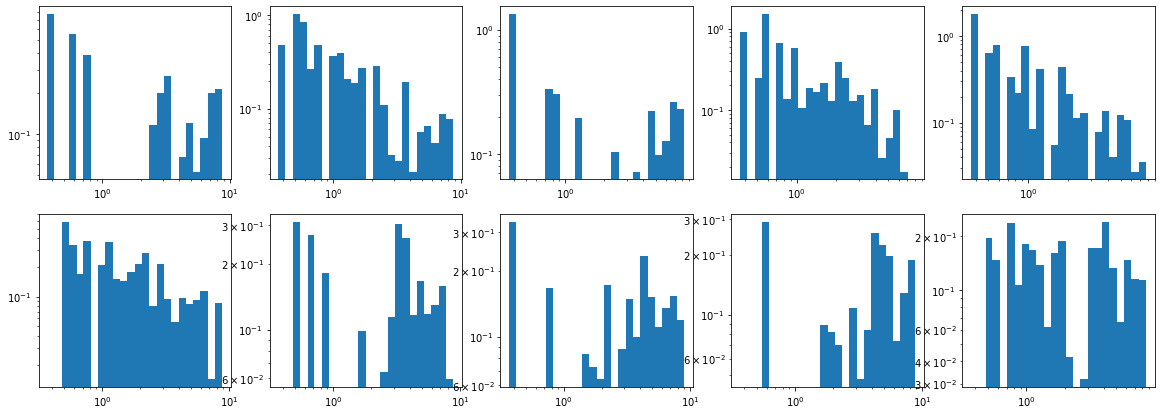

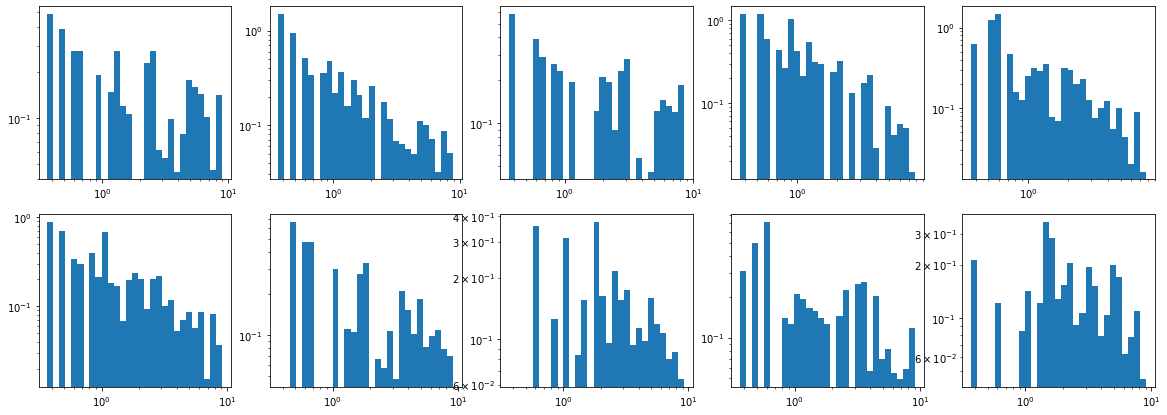

In [34]:
plt.figure(figsize=(20,7))

for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df70_avg_out[i]["out_degree"].min()),np.log10(df70_avg_out[i]["out_degree"].max()),base=np.e,endpoint=True,num=25),2).tolist()
    pdf=plt.hist(df70_avg_out[i]["out_degree"],bins=bins,density=True)
    #plt.hist(df70_avg_out[i]["out_degree"],bins=30,density=True)

    plt.xscale("log")
    plt.yscale("log")
#    plt.xlim(df70_avg_out[i]["out_degree"].min(),df70_avg_out[i]["out_degree"].max())
    #plt.title("sitc4-%d:The distribution of outdegree 1970"%i,{'fontsize':8})
plt.savefig(r".\graph\outdegree\70\outdegree_70_%d.png"%i)
plt.show()

plt.figure(figsize=(20,7))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df80_avg_out[i]["out_degree"].min()),np.log10(df80_avg_out[i]["out_degree"].max()),base=np.e,endpoint=True,num=25),2).tolist()
    plt.hist(df80_avg_out[i]["out_degree"],bins=bins,density=True)

    plt.xscale("log")
    plt.yscale("log")
#    plt.title("sitc4-%d:The distribution of outdegree 1980"%i,{'fontsize':8})
plt.savefig(r".\graph\outdegree\80\outdegree_80_%d.png"%i)
plt.show()

plt.figure(figsize=(20,7))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df90_avg_out[i]["out_degree"].min()),np.log10(df90_avg_out[i]["out_degree"].max()),base=np.e,endpoint=True,num=30),2).tolist()
    plt.hist(df90_avg_out[i]["out_degree"],bins=bins,density=True)
#    plt.text(df90_avg_out[i]["out_degree"].max()-100,0.005,"1990-%d"%i,fontsize=20)

    plt.xscale("log")
    plt.yscale("log")
#    plt.title("sitc4 - %d:The distribution of outdegree 1990"%i,{'fontsize':8})
plt.savefig(r".\graph\outdegree\90\outdegree_90_%d.png"%i)
plt.show()


distribution of mean volume

In [74]:
# sitc4 첫자리 번호와 리스트 df70_nm의 인덱스 번호를 일치시켜서 정리
df70_nm=[df70.loc[df70["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
df80_nm=[df80.loc[df80["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
df90_nm=[df90.loc[df90["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]

# 각국의 연도 별 총 수출액을 더한다. 
df70_sum=[df70_nm[i][["year","ecode","value"]].groupby(["year","ecode"]).sum().reset_index() for i in range(0,10)]
df80_sum=[df80_nm[i][["year","ecode","value"]].groupby(["year","ecode"]).sum().reset_index() for i in range(0,10)]
df90_sum=[df90_nm[i][["year","ecode","value"]].groupby(["year","ecode"]).sum().reset_index() for i in range(0,10)]

# 각국의 품목별 10년 평균 수출액을 구한다.
df70_vol_mean=[df70_sum[i].groupby(["ecode"])["value"].agg(decade_avg).reset_index() for i in range(0,10)]
df80_vol_mean=[df80_sum[i].groupby(["ecode"])["value"].agg(decade_avg).reset_index() for i in range(0,10)]
df90_vol_mean=[df90_sum[i].groupby(["ecode"])["value"].agg(decade_avg).reset_index() for i in range(0,10)]

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


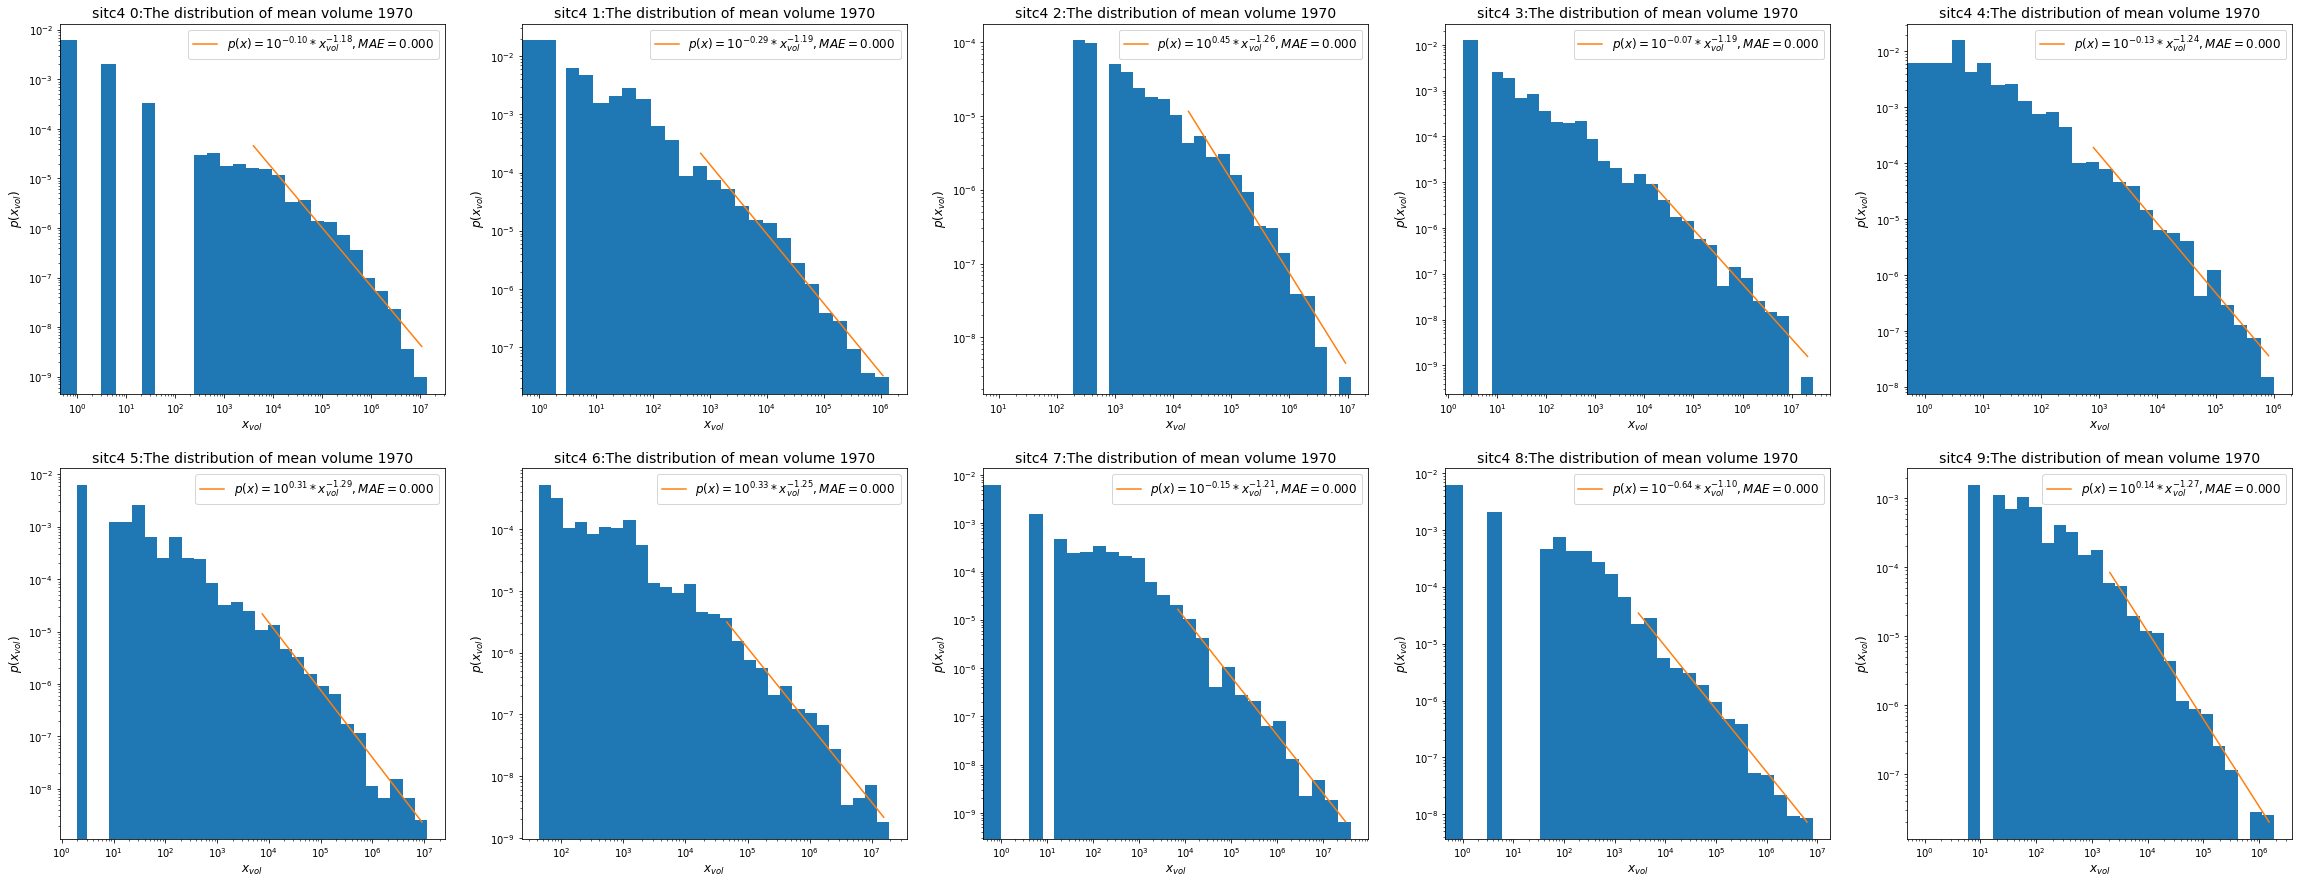

C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\hyde2\Anaconda3\lib

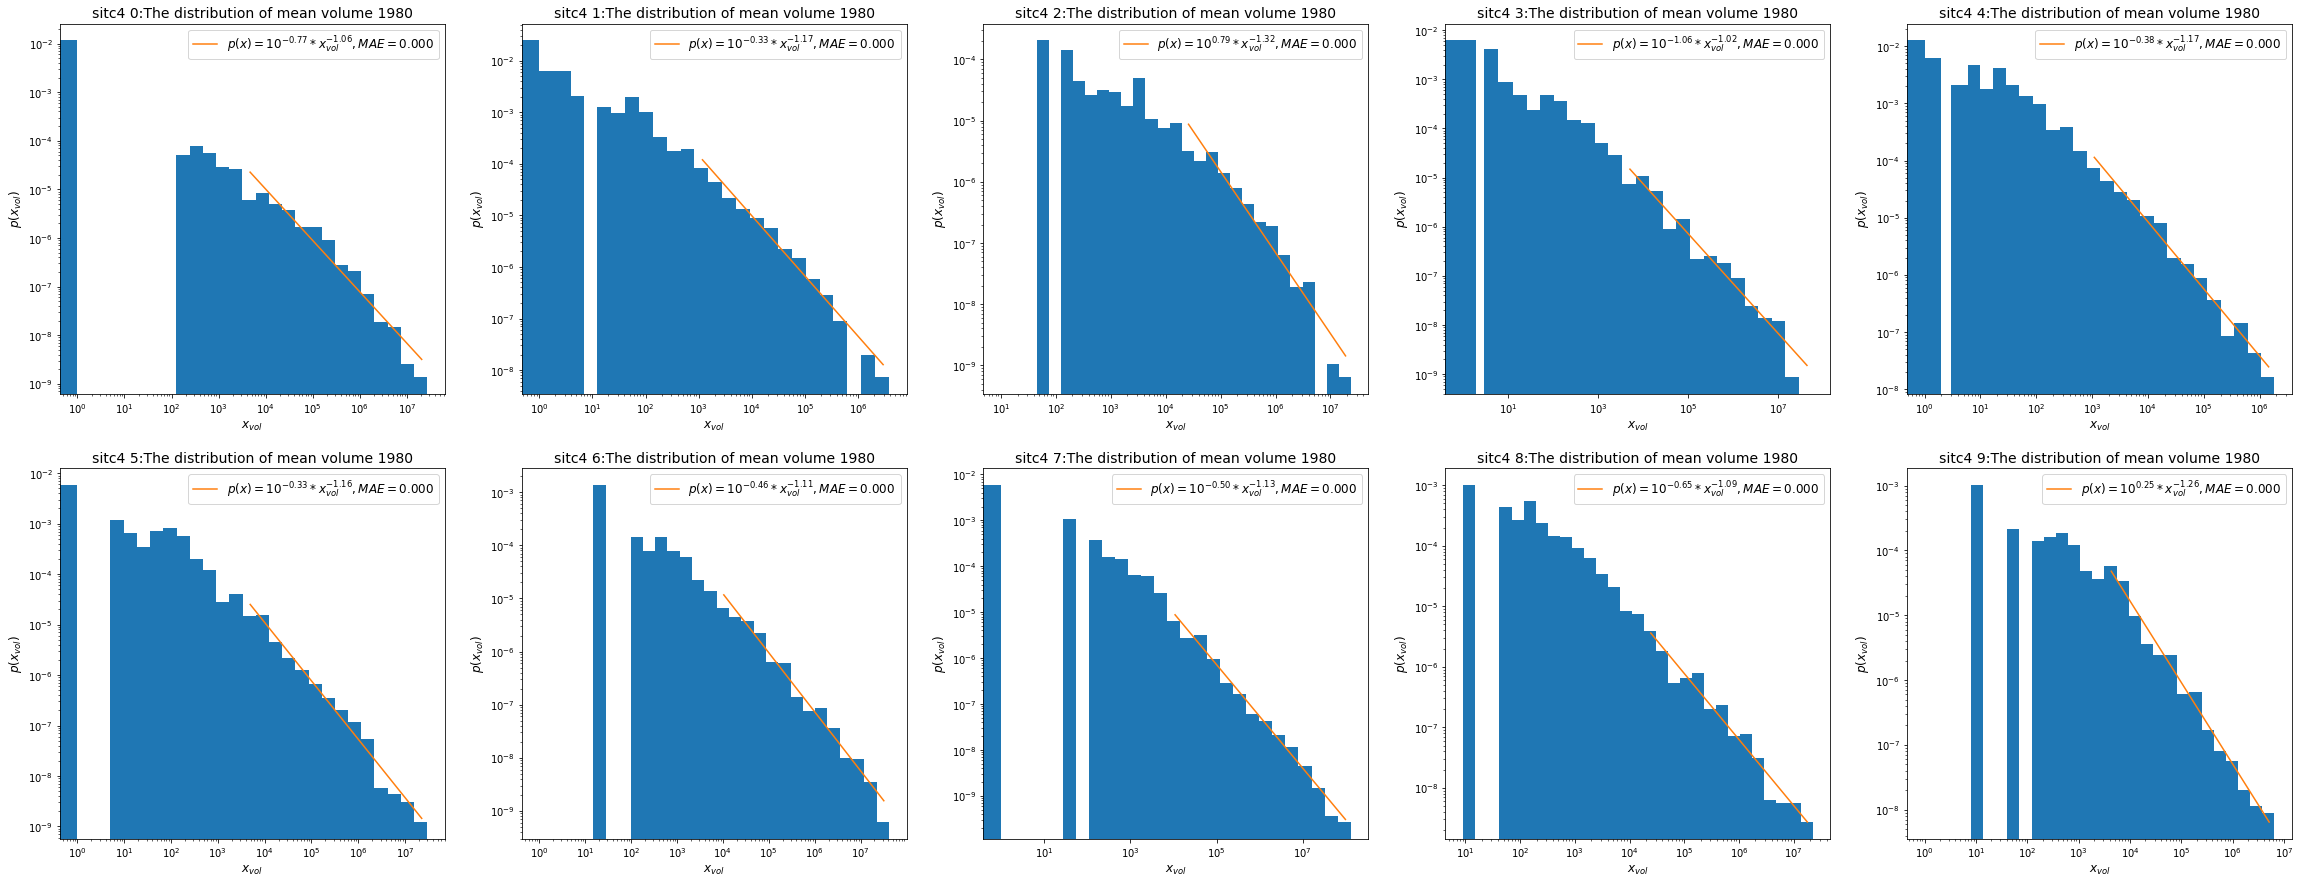

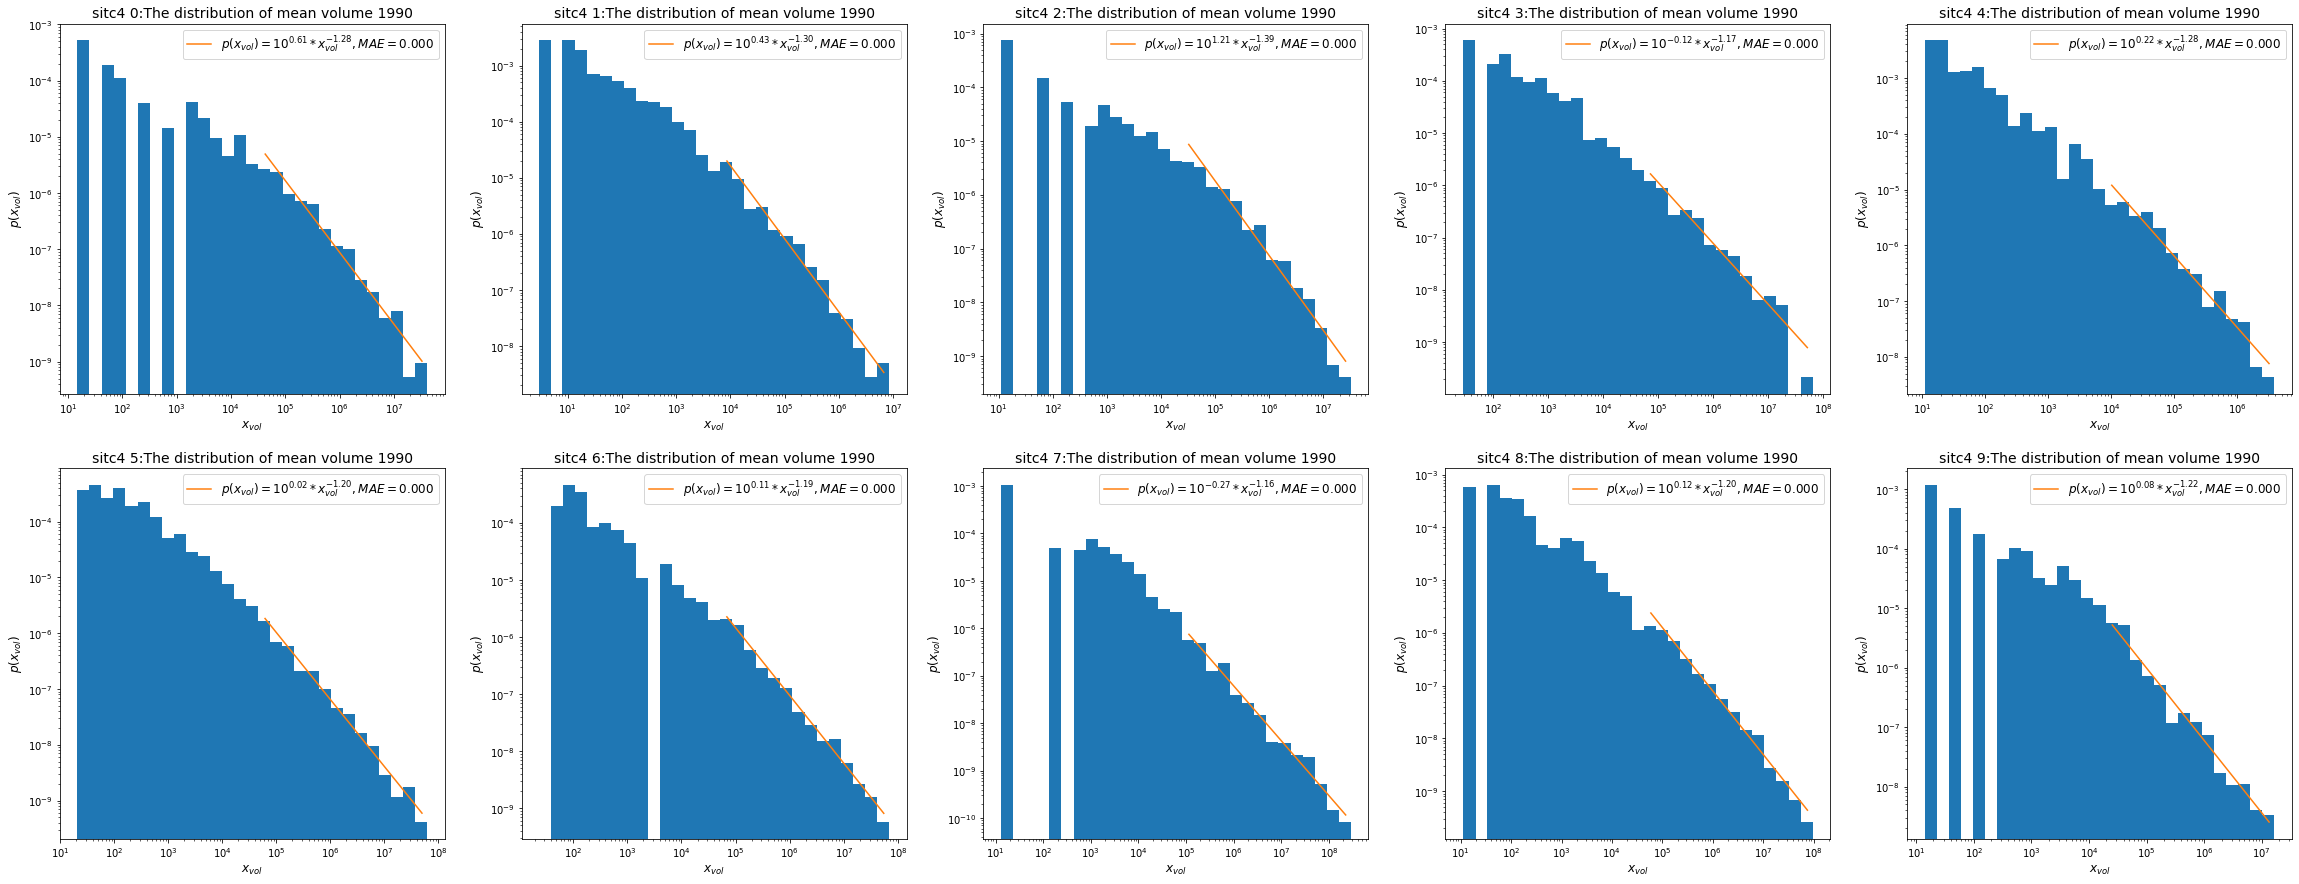

In [1147]:
#stict4 - 0,번에 대해서1970년 평균 수출금액 
upper_70=15
a_70,a_80,a_90=[],[],[]
plt.figure(figsize=(40,15))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df70_vol_mean[i]["value"].min()),np.log10(df70_vol_mean[i]["value"].max()),endpoint=True,num=30)).tolist()
    y=plt.hist(df70_vol_mean[i]["value"],bins=bins,density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_70:],y[0][upper_70:])
    a_70.append(a)
    pred=predict(a,b,x_[upper_70:])
    plt.plot(x_[upper_70:], pred, label=r"$p(x)=10^{%.2f}*x_{vol}^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y[0][upper_70:],pred)))
    plt.legend(fontsize=12)
    
    plt.ylabel(r"$p(x_{vol})$",{'fontsize':12})
    plt.xlabel(r"$x_{vol}$",{'fontsize':12})
    plt.xscale("log")
    plt.yscale("log")
    plt.title("sitc4 %d:The distribution of mean volume 1970"%i,{'fontsize':14})
plt.savefig(r".\graph\volume\70\volume_70_%d.png"%i)
plt.show()

upper_80=15
plt.figure(figsize=(40,15))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df80_vol_mean[i]["value"].min()),np.log10(df80_vol_mean[i]["value"].max()),endpoint=True,num=30)).tolist()
    y=plt.hist(df80_vol_mean[i]["value"],bins=bins,density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_80:],y[0][upper_80:])
    a_80.append(a)
    pred=predict(a,b,x_[upper_80:])
    plt.plot(x_[upper_80:], pred, label=r"$p(x)=10^{%.2f}*x_{vol}^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y[0][upper_80:],pred)))
    plt.legend(fontsize=12)

    plt.ylabel(r"$p(x_{vol})$",{'fontsize':12})
    plt.xlabel(r"$x_{vol}$",{'fontsize':12})

    plt.xscale("log")
    plt.yscale("log")
    plt.title("sitc4 %d:The distribution of mean volume 1980"%i,{'fontsize':14})
plt.savefig(r".\graph\volume\80\volume_80_%d.png"%i)
plt.show()

upper_90=15
plt.figure(figsize=(40,15))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    bins=np.round(np.logspace(np.log10(df90_vol_mean[i]["value"].min()),np.log10(df90_vol_mean[i]["value"].max()),endpoint=True,num=30)).tolist()
    y=plt.hist(df90_vol_mean[i]["value"],bins=bins,density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_[upper_90:],y[0][upper_90:])
    pred=predict(a,b,x_[upper_90:])
    plt.plot(x_[upper_90:], pred, label=r"$p(x_{vol})=10^{%.2f}*x_{vol}^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y[0][upper_90:],pred)))
    a_90.append(a)

    plt.legend(fontsize=12)
    plt.ylabel(r"$p(x_{vol})$", {'fontsize':12})
    plt.xlabel(r"$x_{vol}$",{'fontsize':12})

    plt.xscale("log")
    plt.yscale("log")
    plt.title("sitc4 %d:The distribution of mean volume 1990"%i,{'fontsize':14})
plt.savefig(r".\graph\volume\90\volume_90_%d.png"%i)
plt.show()


In [77]:
df70_avg_vol_out=[pd.merge(df70_vol_mean[i], df70_avg_out[i], how="outer", on="ecode") for i in range(0,10)]
df80_avg_vol_out=[pd.merge(df80_vol_mean[i], df80_avg_out[i], how="outer", on="ecode") for i in range(0,10)]
df90_avg_vol_out=[pd.merge(df90_vol_mean[i], df90_avg_out[i], how="outer", on="ecode") for i in range(0,10)]

volume-outdegree scatter plot

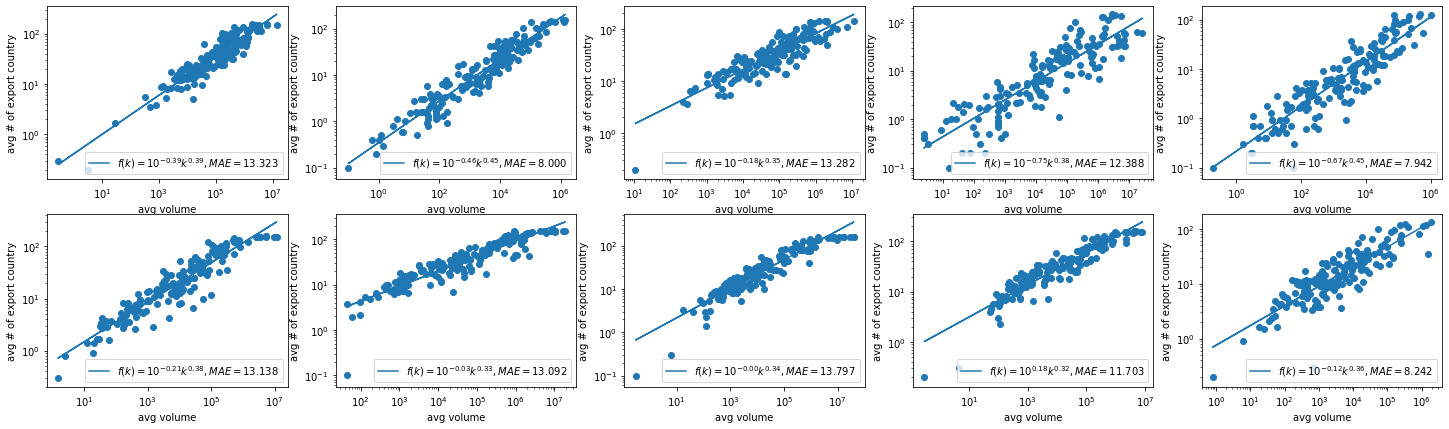

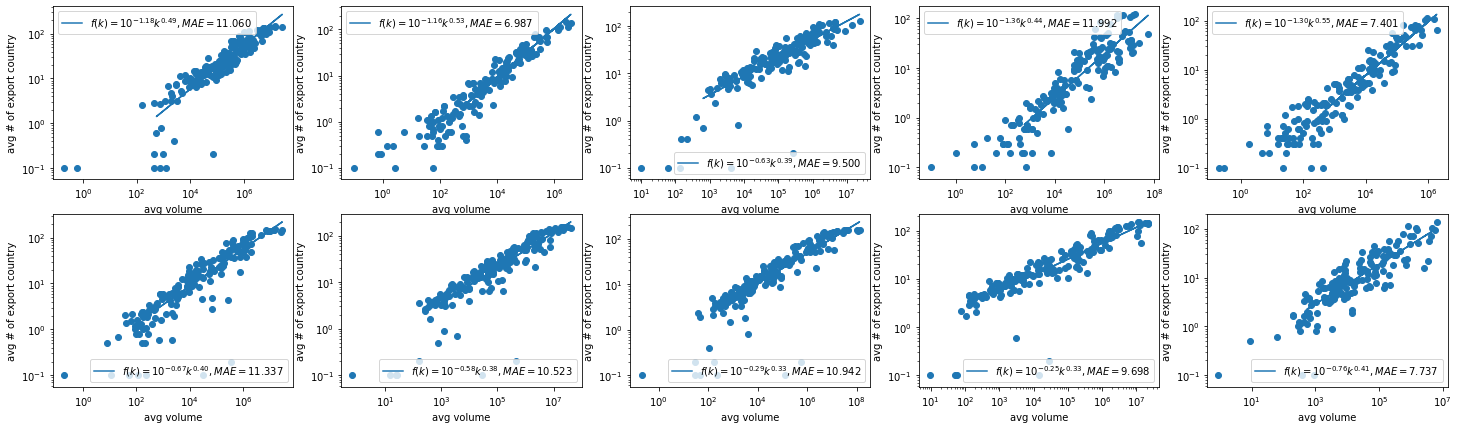

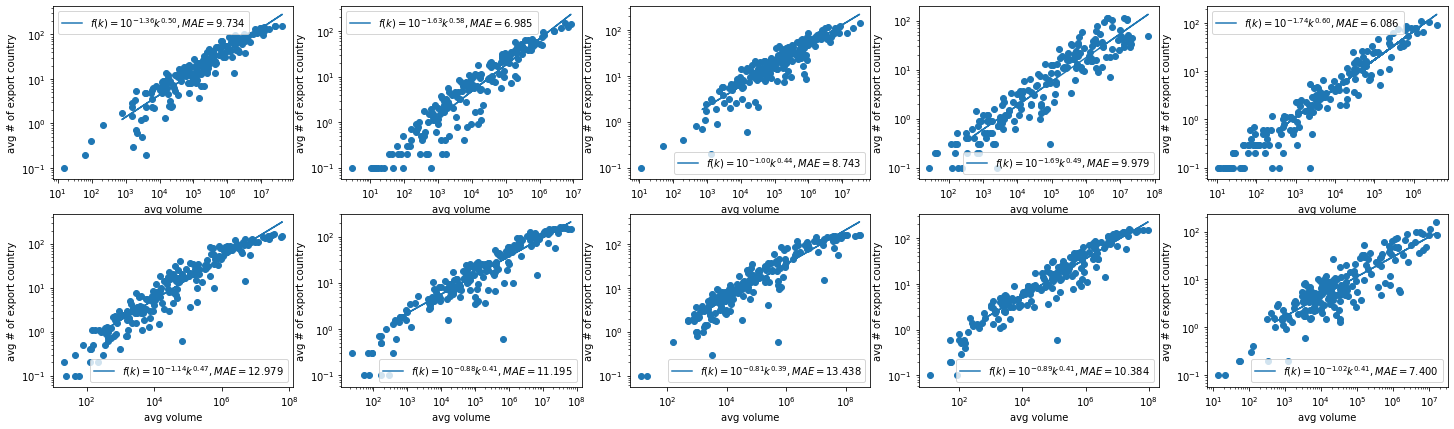

In [80]:
plt.figure(figsize=(25,7))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.scatter(df70_avg_vol_out[i]["value"],df70_avg_vol_out[i]["out_degree"])
    a,b=least(df70_avg_vol_out[i]["value"],df70_avg_vol_out[i]["out_degree"])
    pred=predict(a,b,df70_avg_vol_out[i]["value"])
    plt.plot(df70_avg_vol_out[i]["value"], pred, label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(df70_avg_vol_out[i]["out_degree"],pred)))
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("avg volume")
    plt.ylabel("avg # of export country")
plt.show()

plt.figure(figsize=(25,7))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.scatter(df80_avg_vol_out[i]["value"],df80_avg_vol_out[i]["out_degree"])
    x_=df80_avg_vol_out[i].loc[df80_avg_vol_out[i]["value"]>500, "value"]
    y_=df80_avg_vol_out[i].loc[df80_avg_vol_out[i]["value"]>500, "out_degree"]

    a,b=least(x_,y_)
    pred=predict(a,b,x_)
    plt.plot(x_, pred, label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y_,pred)))
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("avg volume")
    plt.ylabel("avg # of export country")
plt.show()

plt.figure(figsize=(25,7))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.scatter(df90_avg_vol_out[i]["value"],df90_avg_vol_out[i]["out_degree"])
    x_=df90_avg_vol_out[i].loc[df90_avg_vol_out[i]["value"]>500, "value"]
    y_=df90_avg_vol_out[i].loc[df90_avg_vol_out[i]["value"]>500, "out_degree"]

    a,b=least(x_,y_)
    pred=predict(a,b,x_)
    plt.plot(x_, pred, label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(y_,pred)))
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("avg volume")
    plt.ylabel("avg # of export country")
plt.show()

### 네트워크 만들기
#### edge list

In [1174]:
d70=df70[["icode","ecode", "value","sitc4_f"]]
d70_n=[d70.loc[d70["sitc4_f"]=="%d"%i].reset_index(drop=True) for i in range(0,10)]

d80=df80[["icode","ecode", "value","sitc4_f"]]
d80_n=[d80.loc[d80["sitc4_f"]=="%d"%i].reset_index(drop=True) for i in range(0,10)]

d90=df90[["icode","ecode", "value","sitc4_f"]]
d90_n=[d90.loc[d90["sitc4_f"]=="%d"%i].reset_index(drop=True) for i in range(0,10)]


In [1175]:
network_70=[d70_n[i][["icode","ecode","value"]].groupby(["icode","ecode"]).agg(decade_avg).reset_index() for i in range(0,10)]
network_80=[d80_n[i][["icode","ecode","value"]].groupby(["icode","ecode"]).agg(decade_avg).reset_index() for i in range(0,10)]
network_90=[d90_n[i][["icode","ecode","value"]].groupby(["icode","ecode"]).agg(decade_avg).reset_index() for i in range(0,10)]

### clustering coefficient

In [89]:
from pyvis.network import Network
import networkx as nx

In [385]:
# 각 년대, 각 물품별 그래프를 그리기
G70=[nx.from_pandas_edgelist(network_70[i], "ecode", 'icode', edge_attr="value",create_using=nx.DiGraph()) for i in range(0,10)]
G80=[nx.from_pandas_edgelist(network_80[i], "ecode", 'icode', edge_attr="value",create_using=nx.DiGraph()) for i in range(0,10)]
G90=[nx.from_pandas_edgelist(network_90[i], "ecode", 'icode', edge_attr="value",create_using=nx.DiGraph()) for i in range(0,10)]

In [386]:
# 각 년대별 노드만 모으기
Gdf_70=[pd.DataFrame(data={"country":G70[i].nodes()}) for i in range(0,10)]
Gdf_80=[pd.DataFrame(data={"country":G80[i].nodes()}) for i in range(0,10)]
Gdf_90=[pd.DataFrame(data={"country":G90[i].nodes()}) for i in range(0,10)]

In [387]:
# 클러스터링 추가
GDF_70=[Gdf_70[i]["country"].map(lambda x:nx.clustering(G70[i],x)) for i in range(0,10)]
GDF_80=[Gdf_80[i]["country"].map(lambda x:nx.clustering(G80[i],x)) for i in range(0,10)]
GDF_90=[Gdf_90[i]["country"].map(lambda x:nx.clustering(G90[i],x)) for i in range(0,10)]

In [388]:
Graph_70=[pd.DataFrame(data={"ecode":Gdf_70[i]["country"],"clustering":GDF_70[i]}) for i in range(0,10)]
Graph_80=[pd.DataFrame(data={"ecode":Gdf_80[i]["country"],"clustering":GDF_80[i]}) for i in range(0,10)]
Graph_90=[pd.DataFrame(data={"ecode":Gdf_90[i]["country"],"clustering":GDF_90[i]}) for i in range(0,10)]

In [390]:
GR_70=[pd.merge(Graph_70[i],df70_avg_out[i],how="outer",on="ecode") for i in range(0,10)]
GR_80=[pd.merge(Graph_80[i],df80_avg_out[i],how="outer",on="ecode") for i in range(0,10)]
GR_90=[pd.merge(Graph_90[i],df90_avg_out[i],how="outer",on="ecode") for i in range(0,10)]

In [474]:
# 빠진 국가코드 추가
for i,j in zip((538960, 338960,582210 ,558960, 358960,999990),("EEC NES", "LAIA NES","E Europe NES","Eur. EFTA NS", "Carib. NES","Int Org")):
    country70[i]=j
    country80[i]=j
    country90[i]=j

In [476]:
GR_70[0].head()

,ecode,clustering,out_degree
0,138180,0.646511,78.4
1,117100,0.715465,58.1
2,141400,0.845518,15.4
3,160240,0.835181,28.1
4,161800,0.701188,34.2


In [477]:
for i in range(0, 10):
    GR_70[i]["ecode"]=GR_70[i]["ecode"].map(lambda x: country70[x])
    
for i in range(0, 10):
    GR_80[i]["ecode"]=GR_80[i]["ecode"].map(lambda x: country80[x])
    
for i in range(0, 10):
    GR_90[i]["ecode"]=GR_90[i]["ecode"].map(lambda x: country90[x])

Clustering 계수가 작은 노드

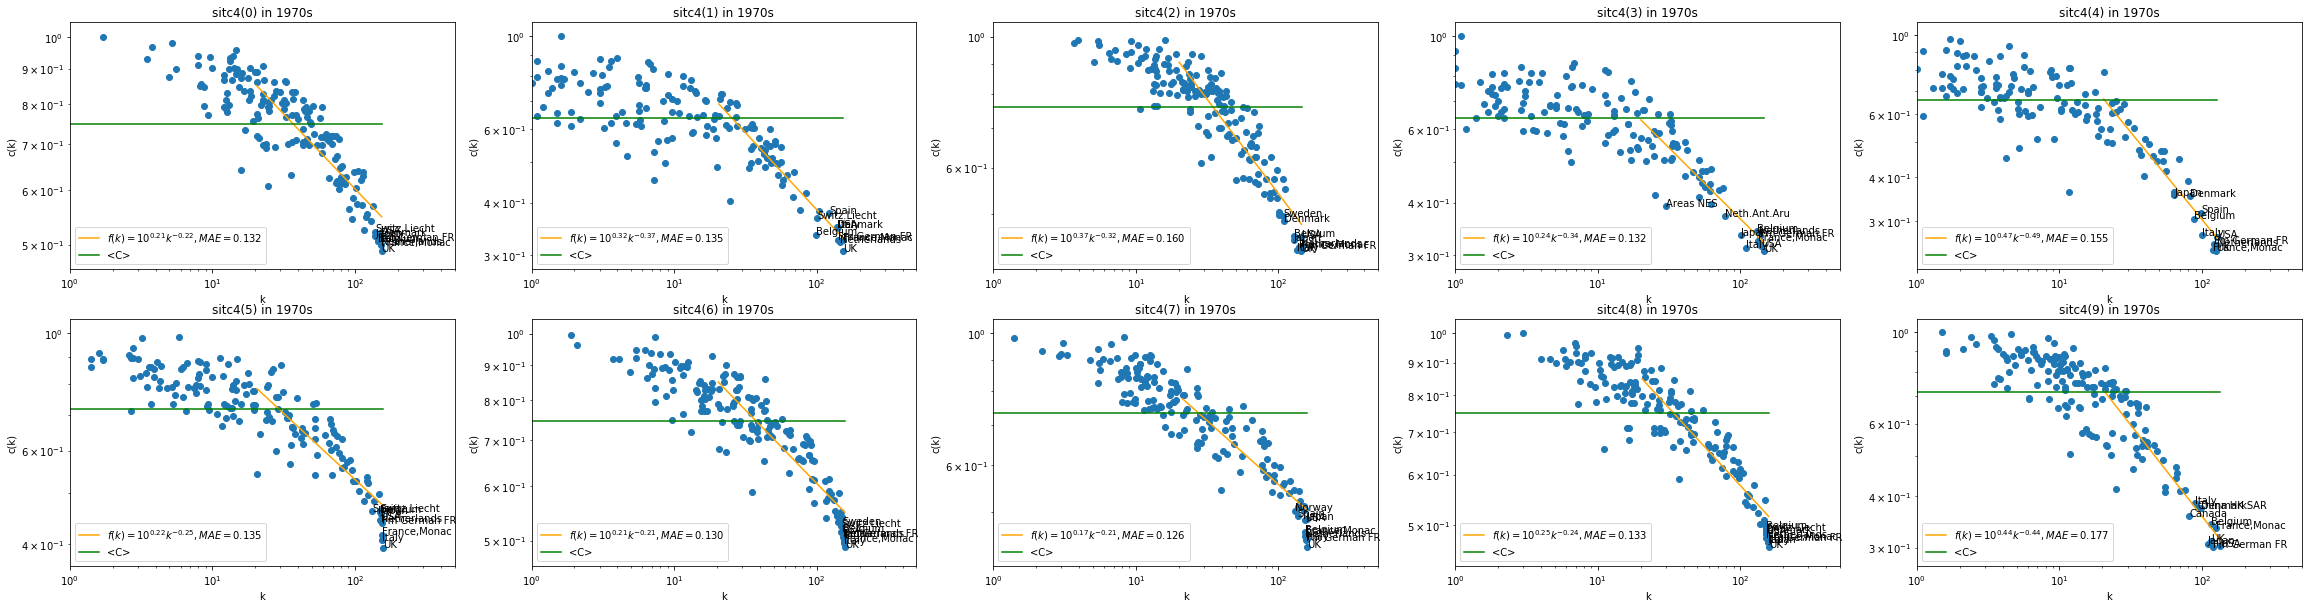

In [1143]:
plt.figure(figsize=(40,10))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.scatter(GR_70[i]["out_degree"],GR_70[i]["clustering"])
    df=GR_70[i].loc[(~GR_70[i]["out_degree"].isna())&(GR_70[i]["clustering"]>0)].copy().sort_values(by="clustering").reset_index(drop=True).head(10)

    for n,m,l in zip(df["out_degree"],df["clustering"],df["ecode"]):
        plt.text(n,m,l)

    GG_70=GR_70[i].loc[GR_70[i]["out_degree"]>20].reset_index(drop=True)
    a,b=least(GG_70["out_degree"],GG_70["clustering"])
    pred=predict(a,b,GG_70["out_degree"].sort_values())
    plt.plot(GG_70["out_degree"].sort_values(), pred,"orange", label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(GG_70["clustering"],pred)))
    plt.plot([GR_70[i]["out_degree"].min(),GR_70[i]["out_degree"].max(),],[GR_70[i]["clustering"].mean(),GR_70[i]["clustering"].mean()],"g",label="<C>")
    plt.legend(loc=3)
    plt.xlim(1,500)
    plt.title("sitc4(%d) in 1970s"%i)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("k")
    plt.ylabel("c(k)")
plt.savefig(r".\graph\clustering\clustering70.png")
plt.show()

In [526]:
df

,ecode,clustering,out_degree
0,Japan,0.257148,94.5
1,USA,0.265939,138.4
2,Fm German FR,0.266896,96.6


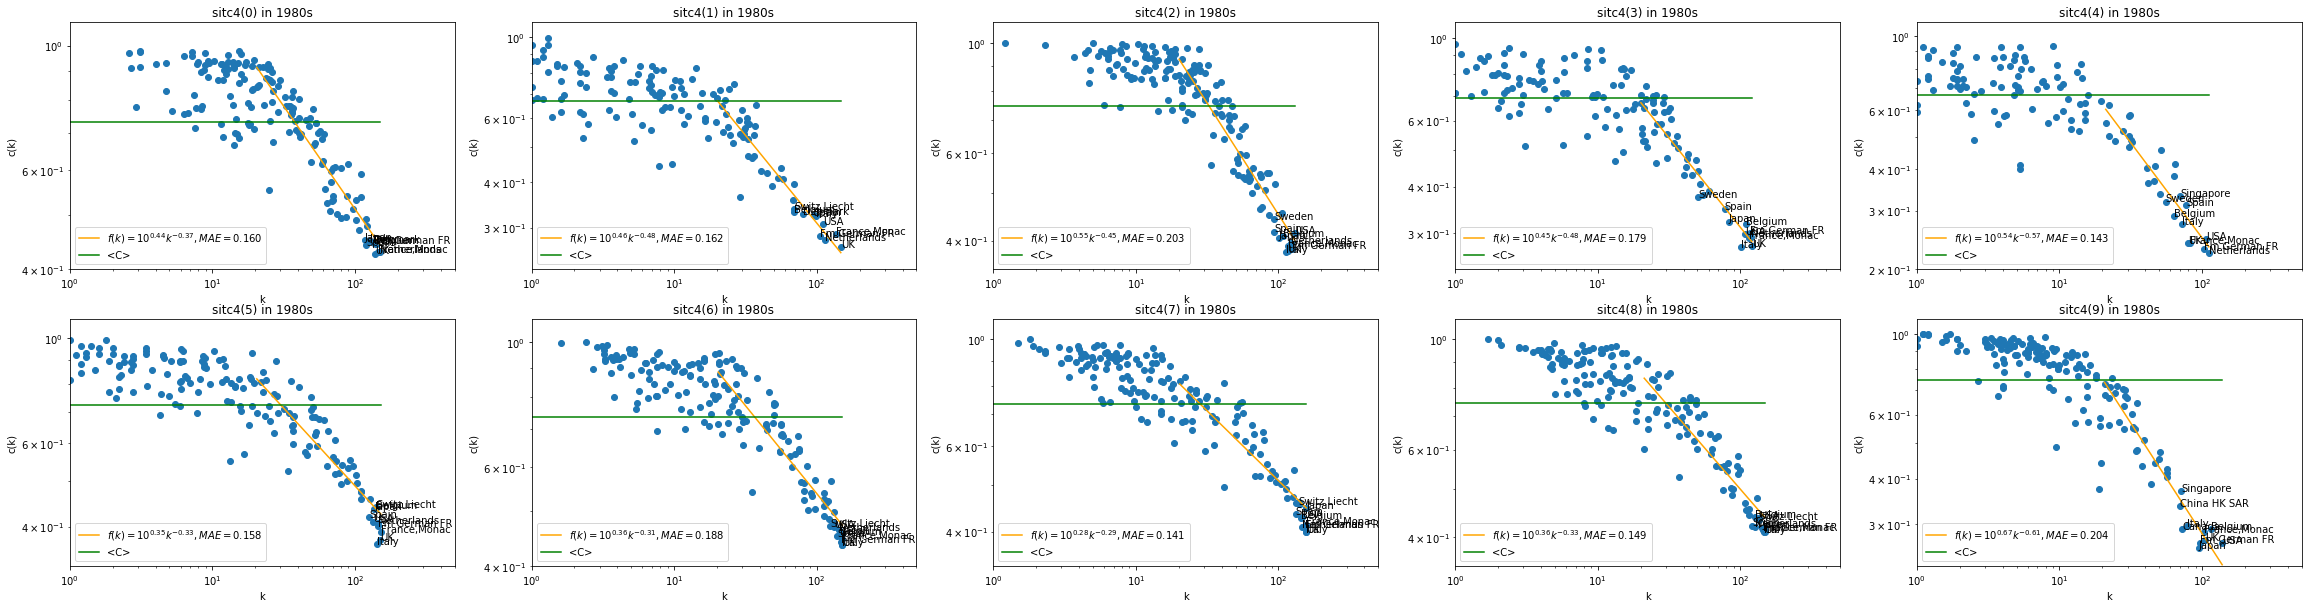

In [1144]:
plt.figure(figsize=(40,10))
ylm=[0.4,0.23,0.35,0.24,0.2,0.33,0.4,0.34,0.35,0.23]
for i,j in zip(range(0,10),ylm):
    plt.subplot(2,5,i+1)
    plt.scatter(GR_80[i]["out_degree"],GR_80[i]["clustering"])
    GG_80=GR_80[i].loc[(GR_80[i]["out_degree"]>20)].reset_index(drop=True)
    a,b=least(GG_80["out_degree"],GG_80["clustering"])
    pred=predict(a,b,GG_80["out_degree"].sort_values())
    plt.plot(GG_80["out_degree"].sort_values(), pred,"orange", label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(GG_80["clustering"],pred)))

    df=GR_80[i].loc[(~GR_80[i]["out_degree"].isna())&(GR_80[i]["clustering"]>0)].copy().sort_values(by="clustering").reset_index(drop=True).head(10)

    for n,m,l in zip(df["out_degree"],df["clustering"],df["ecode"]):
        plt.text(n,m,l)

    plt.plot([GR_80[i]["out_degree"].min(),GR_80[i]["out_degree"].max(),],[GR_80[i]["clustering"].mean(),GR_80[i]["clustering"].mean()],"g",label="<C>")
    
    plt.title("sitc4(%d) in 1980s"%i)
    plt.xlim(1,500)

    plt.ylim(j,1.1)
    plt.legend(loc=3)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("k")
    plt.ylabel("c(k)")
plt.savefig(r".\graph\clustering\clustering80.png")

plt.show()


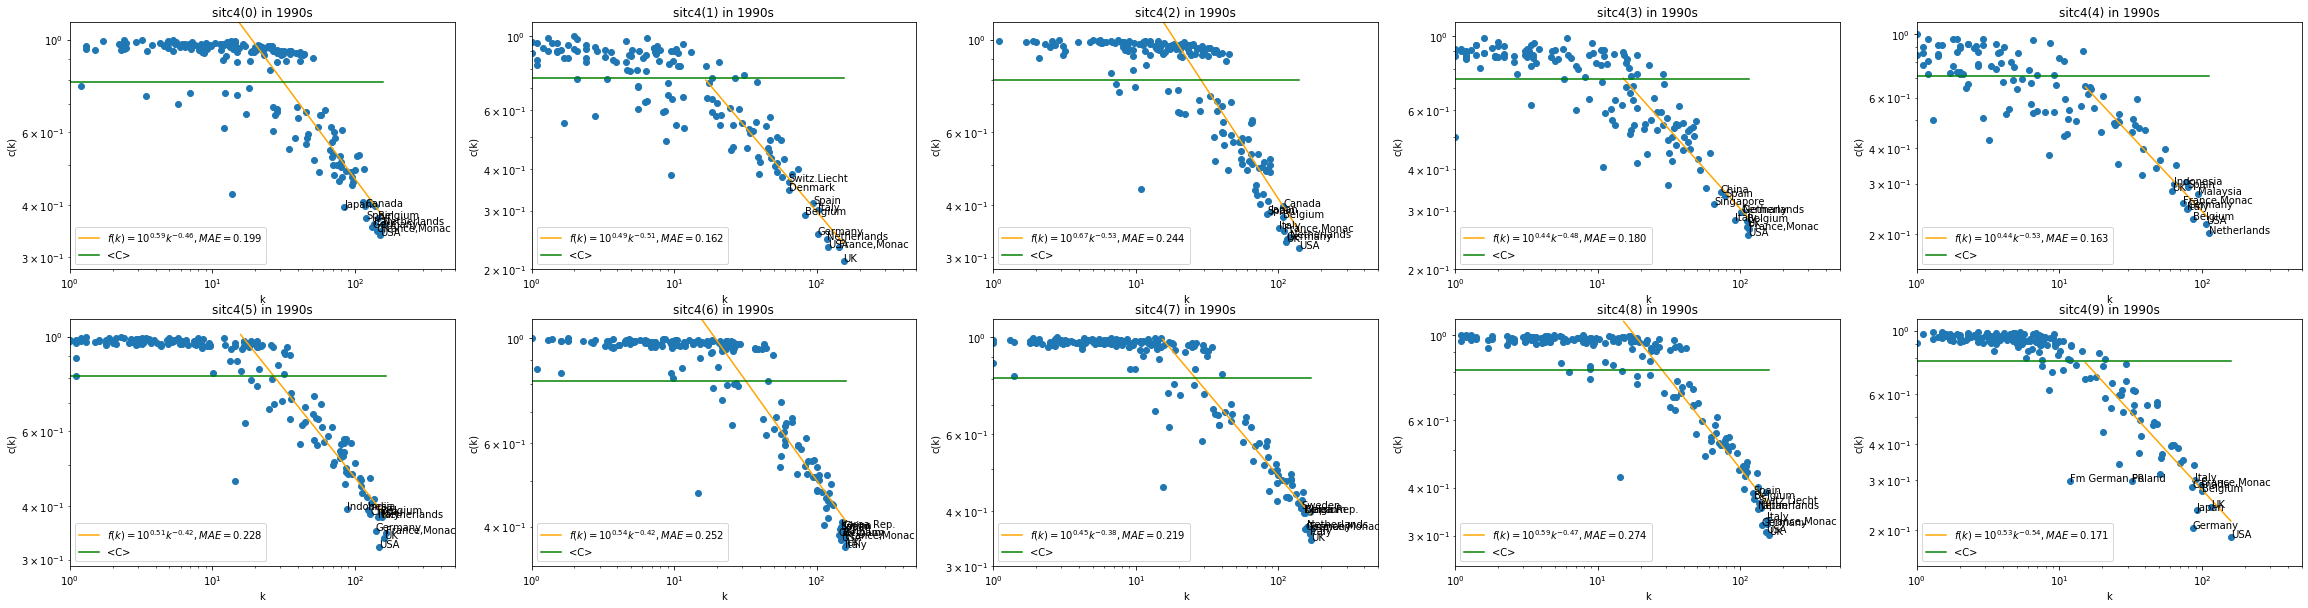

In [1145]:
plt.figure(figsize=(40,10))
ylm_=[0.28,0.20,0.28,0.2,0.15,0.29,0.33,0.3,0.25,0.15]

for j,i in zip(ylm_,range(0,10)):
    plt.subplot(2,5,i+1)
    plt.scatter(GR_90[i]["out_degree"],GR_90[i]["clustering"])
    df=GR_90[i].loc[(~GR_90[i]["out_degree"].isna())&(GR_90[i]["clustering"]>0)].copy().sort_values(by="clustering").reset_index(drop=True).head(10)

    for n,m,l in zip(df["out_degree"],df["clustering"],df["ecode"]):
        plt.text(n,m,l)

    
    GG_90=GR_90[i].loc[GR_90[i]["out_degree"]>15].reset_index(drop=True)
    a,b=least(GG_90["out_degree"],GG_90["clustering"])
    pred=predict(a,b,GG_90["out_degree"].sort_values())

    plt.plot(GG_90["out_degree"].sort_values(), pred,"orange", label=r"$f(k)=10^{%.2f}k^{%.2f}, MAE=%.3f$"%(b,a,mean_absolute_error(GG_90["clustering"],pred)))
    plt.plot([GR_90[i]["out_degree"].min(),GR_90[i]["out_degree"].max(),],[GR_90[i]["clustering"].mean(),GR_90[i]["clustering"].mean()],"g",label="<C>")

    plt.title("sitc4(%d) in 1990s"%i)

    plt.legend(loc=3)
    plt.ylim(j,1.1)
    plt.xlim(1,500)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("k")
    plt.ylabel("c(k)")
plt.savefig(r".\graph\clustering\clustering90.png")

plt.show()


In [1176]:
network_70[0].head()

,icode,ecode,value
0,117100,138180,0.3
1,117100,141400,9.8
2,117100,160240,1733.3
3,117100,161800,13.6
4,117100,163840,7056.9


In [1177]:
for i in range(0, 10):
    network_70[i]["i_label"]=network_70[i]["icode"].map(lambda x: country70[x])
    network_70[i]["e_label"]=network_70[i]["ecode"].map(lambda x: country70[x])
    
for i in range(0, 10):
    try:
        network_80[i]["i_label"]=network_80[i]["icode"].map(lambda x: country80[x])
        network_80[i]["e_label"]=network_80[i]["ecode"].map(lambda x: country80[x])
    except KeyError as t:
        print(t,i)
    
for i in range(0, 10):
    try:
        network_90[i]["i_label"]=network_90[i]["icode"].map(lambda x: country90[x])
        network_90[i]["e_label"]=network_90[i]["ecode"].map(lambda x: country90[x])
    except KeyError as t:
        print(t,i)

### 네트워크 그리기

In [90]:
product=7
nodes=pd.Series(np.concatenate([network_70[product]["icode"].unique(),network_70[product]["ecode"].unique()])).unique()

In [1106]:
top_70=pd.DataFrame(filter70).T


,0,1,2,3,4,5,6,7,8,9
0,Netherlands,"France,Monac",UK,UK,Netherlands,"France,Monac",Japan,Japan,Japan,USA
1,UK,Denmark,USA,"France,Monac",USA,Japan,"France,Monac",UK,UK,"France,Monac"
2,Denmark,UK,Italy,USA,"France,Monac",UK,UK,"France,Monac",USA,Fm German FR
3,"France,Monac",Netherlands,Netherlands,Fm German FR,UK,Denmark,Belgium,Denmark,Denmark,Japan
4,Fm German FR,Fm German FR,"France,Monac",Netherlands,Fm German FR,Italy,Netherlands,USA,"France,Monac",UK
5,Belgium,Italy,Fm German FR,Belgium,Italy,Belgium,Italy,Netherlands,Italy,Belgium
6,Japan,USA,Japan,Italy,Spain,Fm German FR,Fm German FR,Belgium,Netherlands,Denmark
7,Switz.Liecht,Spain,Belgium,Japan,Belgium,Netherlands,Denmark,Italy,Belgium,China HK SAR
8,Ireland,Portugal,Denmark,Switz.Liecht,Denmark,USA,USA,Sweden,Fm German FR,Italy
9,USA,Belgium,Sweden,Sweden,Sweden,Switz.Liecht,Sweden,Fm German FR,Switz.Liecht,Switz.Liecht


In [1107]:
pd.DataFrame(filter80).T

,0,1,2,3,4,5,6,7,8,9
0,Netherlands,"France,Monac",Italy,UK,Netherlands,"France,Monac",Japan,Japan,Japan,"France,Monac"
1,UK,UK,UK,Netherlands,Fm German FR,Italy,"France,Monac","France,Monac","France,Monac",Belgium
2,Denmark,Netherlands,Netherlands,Fm German FR,UK,Belgium,Italy,Denmark,Italy,USA
3,"France,Monac",Fm German FR,"France,Monac","France,Monac",USA,UK,Belgium,UK,UK,Japan
4,Fm German FR,Italy,Fm German FR,Italy,"France,Monac",Fm German FR,UK,Italy,Fm German FR,Fm German FR
5,Italy,Denmark,USA,Belgium,Spain,Japan,Sweden,Netherlands,Belgium,UK
6,Spain,Spain,Belgium,USA,Italy,Netherlands,Netherlands,Fm German FR,Denmark,Italy
7,Belgium,USA,Japan,Japan,Belgium,Denmark,Spain,Spain,Netherlands,China HK SAR
8,Japan,Switz.Liecht,Canada,Switz.Liecht,Singapore,Switz.Liecht,Fm German FR,Belgium,Sweden,Canada
9,USA,Belgium,Sweden,Spain,Sweden,Sweden,Switz.Liecht,Sweden,Switz.Liecht,Denmark


In [1108]:
pd.DataFrame(filter90).T

,0,1,2,3,4,5,6,7,8,9
0,UK,UK,USA,UK,Netherlands,UK,UK,"France,Monac",UK,USA
1,Netherlands,"France,Monac",Netherlands,Belgium,Belgium,USA,"France,Monac",UK,China,Germany
2,"France,Monac",Netherlands,UK,"France,Monac",USA,"France,Monac",Belgium,Japan,USA,UK
3,USA,USA,Germany,Netherlands,Italy,Netherlands,China,USA,"France,Monac",Belgium
4,Belgium,Germany,"France,Monac",USA,Malaysia,Belgium,Italy,Italy,Italy,"France,Monac"
5,Ireland,Belgium,Italy,Germany,"France,Monac",Germany,Spain,Korea Rep.,Korea Rep.,Canada
6,Denmark,Italy,Canada,Italy,Germany,Italy,Netherlands,China,Germany,Indonesia
7,Italy,Spain,Belgium,Spain,Spain,Japan,USA,Netherlands,Switz.Liecht,Japan
8,Germany,Denmark,Spain,China,Indonesia,Switz.Liecht,Korea Rep.,Sweden,Japan,Italy
9,China,Brazil,China,Greece,Singapore,India,Germany,Germany,Netherlands,Sweden


In [1100]:
print(target_70)
print(target_80)
print(target_90)


[163, 162, 162, 163, 160, 162, 163, 163, 162, 161]
[162, 161, 162, 161, 162, 161, 163, 163, 162, 161]
[191, 187, 187, 186, 187, 188, 191, 190, 191, 191]


In [1188]:
node_lst

,node,size,label
123,532500,48.3,"France,Monac"
122,532080,48.3,Denmark
131,538260,48.0,UK
128,535280,47.7,Netherlands
124,532800,47.4,Fm German FR
...,...,...,...
30,165620,0.3,Niger
110,454460,0.3,China MC SAR
112,455240,0.3,Nepal
152,725400,0.3,New Calednia


In [1250]:
product=0
net70=network_70[product].copy()
#filter_=network_70[product]["ecode"].value_counts().index.tolist()[:10]
#net70=network_70[product].loc[(network_70[product]["icode"].isin(filter_))|(network_70[product]["ecode"].isin(filter_))]
net70["value_"]=net70["value"].copy()*0.0001

node_lst=net70[["icode","ecode"]].groupby("ecode")["icode"].nunique().reset_index()
node_lst["color"]=np.repeat('#00c3ff',node_lst.shape[0])
node_lst.columns=["node","size","color"]
inode=list(set(net70["icode"].unique().tolist())-set(net70["ecode"].unique().tolist()))
node_=pd.DataFrame(data={"node":inode, 
                         "size":np.repeat(1,len(inode)),
                         "color":np.repeat("#969696",len(inode))})
node_lst=pd.concat([node_lst, node_]).reset_index(drop=True)
node_lst["label"]=node_lst["node"].map(lambda x: country70[x])
node_lst["size"]=node_lst["size"]*0.1*1

g=Network(height=800, width=800,notebook=True, directed=True)
g.add_nodes(node_lst["node"],value=node_lst["size"],label=node_lst["label"], color=node_lst["color"])
for source, target,w in zip(net70["ecode"],net70["icode"],net70["value_"]):
    g.add_edge(source, target, weight=w)

g.toggle_hide_edges_on_drag(True)
g.force_atlas_2based()
g.show_buttons(filter_=['physics'])
g.show("n.html")

In [1231]:
net70.sort_values(by="value_",ascending=False)

,icode,ecode,value,i_label,e_label,value_
2036,218400,538260,388002.7,USA,UK,3.880027
1972,218400,211240,241181.7,USA,Canada,2.411817
5498,532800,532500,224744.4,Fm German FR,"France,Monac",2.247444
6126,538260,532500,218505.0,UK,"France,Monac",2.185050
2028,218400,532500,186681.5,USA,"France,Monac",1.866815
...,...,...,...,...,...,...
5865,536200,130120,0.1,Portugal,Algeria,0.000001
5878,536200,220600,0.1,Portugal,Bermuda,0.000001
3958,446340,536200,0.1,Qatar,Portugal,0.000001
5120,530560,223040,0.1,Belgium,Greenland,0.000001


In [1236]:
target_70,filter70=[],[]
for product in range(0,10):
    filter_=network_70[product]["ecode"].value_counts().index.tolist()[:10]
    filter70.append(filter_)
    net70=network_70[product].loc[(network_70[product]["icode"].isin(filter_))|(network_70[product]["ecode"].isin(filter_))]
    target_70.append(net70["icode"].nunique())
    net70["value_"]=net70["value"].copy()*0.00001

    node_lst=net70[["icode","ecode"]].groupby("ecode")["icode"].nunique().reset_index()
    node_lst.columns=["node","size"]
    inode=list(set(net70["icode"].unique().tolist())-set(net70["ecode"].unique().tolist()))

    node_lst["color"]=np.repeat('#00c3ff',node_lst.shape[0])
    node_lst.columns=["node","size","color"]

    node_=pd.DataFrame(data={"node":inode, "size":np.repeat(1,len(inode)), "color":np.repeat("#969696",len(inode))})
    node_lst=pd.concat([node_lst, node_]).reset_index(drop=True)
    node_lst["label"]=node_lst["node"].map(lambda x: country70[x])
    node_lst["size"]=node_lst["size"]*0.1

    g=Network(height=800, width=800,notebook=True, directed=True)
    g.add_nodes(node_lst["node"],value=node_lst["size"],label=node_lst["label"], color=node_lst["color"])
    for source, target,w in zip(net70["ecode"],net70["icode"],net70["value_"]):
        g.add_edge(source, target, weight=w)

    g.toggle_hide_edges_on_drag(True)
    g.force_atlas_2based()
    g.show_buttons(filter_=['physics'])
    g.show("net70_%d.html"%(product))

C:\Users\hyde2\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [1234]:
target_80,target_90=[],[]
filter80,filter90=[],[]
for product in range(0,10):
    filter_=network_80[product]["ecode"].value_counts().index.tolist()[:10]
    net80=network_80[product].loc[(network_80[product]["icode"].isin(filter_))|(network_80[product]["ecode"].isin(filter_))]
    target_80.append(net80["icode"].nunique())
    filter80.append(filter_)
    net80["value_"]=net80["value"].copy()*0.00001

    node_lst=net80[["icode","ecode"]].groupby("ecode")["icode"].nunique().reset_index()
    node_lst.columns=["node","size"]
    inode=list(set(net80["icode"].unique().tolist())-set(net80["ecode"].unique().tolist()))
    node_lst["color"]=np.repeat('#00c3ff',node_lst.shape[0])
    node_lst.columns=["node","size","color"]

    node_=pd.DataFrame(data={"node":inode, "size":np.repeat(1,len(inode)), "color":np.repeat("#969696",len(inode))})
    node_lst=pd.concat([node_lst, node_]).reset_index(drop=True)
    node_lst["label"]=node_lst["node"].map(lambda x: country80[x])
    node_lst["size"]=node_lst["size"]*0.1
    
    g=Network(height=800, width=800,notebook=True, directed=True)
    g.add_nodes(node_lst["node"],value=node_lst["size"],label=node_lst["label"], color=node_lst["color"])
    for source, target,w in zip(net80["ecode"],net80["icode"],net80["value_"]):
        g.add_edge(source, target, weight=w)

    g.toggle_hide_edges_on_drag(True)
    g.force_atlas_2based()
    g.show_buttons(filter_=['physics'])
    g.show("net80_%d.html"%(product))

for product in range(0,10):
    filter_=network_90[product]["ecode"].value_counts().index.tolist()[:10]
    net90=network_90[product].loc[(network_90[product]["icode"].isin(filter_))|(network_90[product]["ecode"].isin(filter_))]
    target_90.append(net90["icode"].nunique())
    filter90.append(filter_)
    net90["value_"]=net90["value"].copy()*0.00001

    node_lst=net90[["icode","ecode"]].groupby("ecode")["icode"].nunique().reset_index()
    node_lst.columns=["node","size"]
    inode=list(set(net90["icode"].unique().tolist())-set(net90["ecode"].unique().tolist()))
    node_lst["color"]=np.repeat('#00c3ff',node_lst.shape[0])
    node_lst.columns=["node","size","color"]

    node_=pd.DataFrame(data={"node":inode, "size":np.repeat(1,len(inode)), "color":np.repeat("#969696",len(inode))})
    node_lst=pd.concat([node_lst, node_]).reset_index(drop=True)
    node_lst["label"]=node_lst["node"].map(lambda x: country90[x])
    node_lst["size"]=node_lst["size"]*0.1

    g=Network(height=800, width=800,notebook=True, directed=True)
    g.add_nodes(node_lst["node"],value=node_lst["size"],label=node_lst["label"], color=node_lst["color"])
    for source, target,w in zip(net90["ecode"],net90["icode"],net90["value_"]):
        g.add_edge(source, target, weight=w)

    g.toggle_hide_edges_on_drag(True)
    g.force_atlas_2based()
    g.show_buttons(filter_=['physics'])
    g.show("net90_%d.html"%(product))

C:\Users\hyde2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hyde2\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1226]:
net90.loc[net90["ecode"]==532760]

,icode,ecode,value,i_label,e_label,value_
83,117100,532760,23413.0,South Africa,Germany,0.234130
193,130120,532760,53350.3,Algeria,Germany,0.533503
279,134340,532760,76843.5,Libya,Germany,0.768435
386,135040,532760,22105.0,Morocco,Germany,0.221050
441,137360,532760,6674.8,Sudan,Germany,0.066748
...,...,...,...,...,...,...
11146,722420,532760,29.6,Fiji,Germany,0.000296
11166,722960,532760,12.0,Kiribati,Germany,0.000120
11191,725400,532760,217.4,New Calednia,Germany,0.002174
11240,728882,532760,107.1,Samoa,Germany,0.001071


In [ ]:
for product in range(0,10):
    filter_=network_70[product]["ecode"].value_counts().index.tolist()[:10]
    net70=network_70[product].loc[(network_70[product]["icode"].isin(filter_))|(network_70[product]["ecode"].isin(filter_))]
    G=nx.from_pandas_edgelist(net70, "ecode", 'icode', edge_attr="value",create_using=nx.DiGraph())


In [1268]:
print(np.log(1000)/,np.power(1000,1/1.5))

2.763102111592855 99.99999999999997


BA모델 fitting

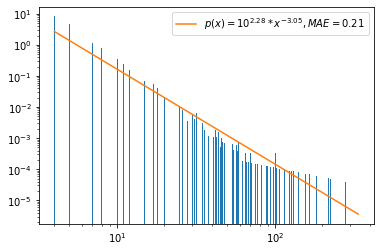

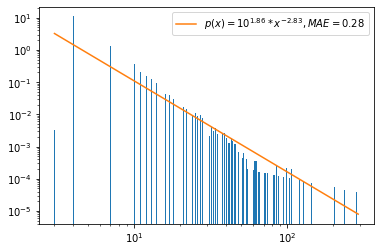

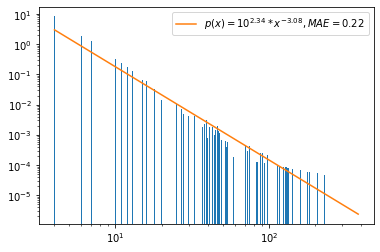

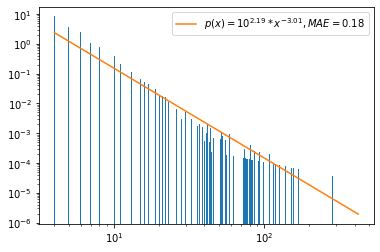

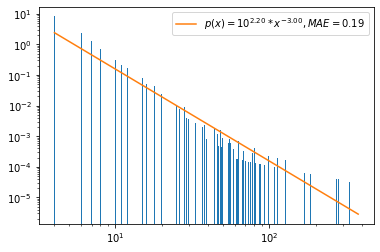

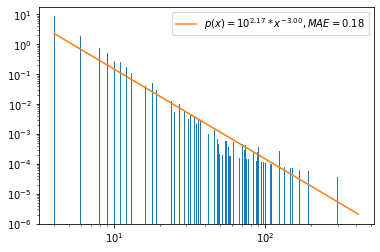

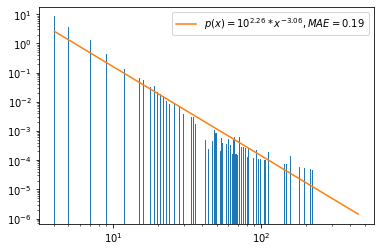

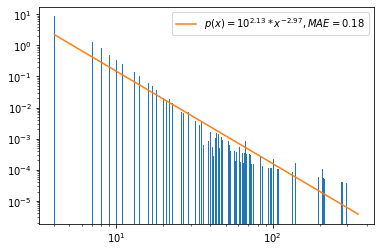

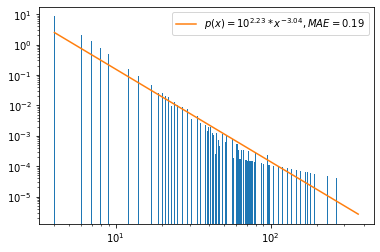

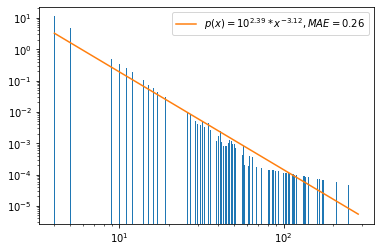

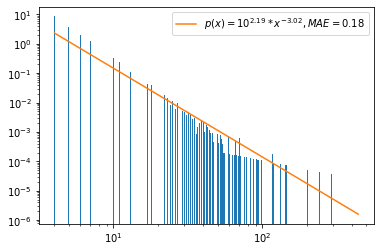

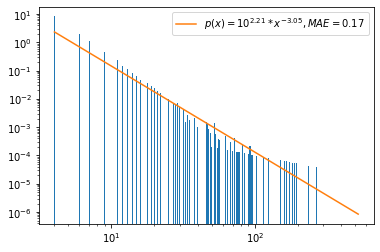

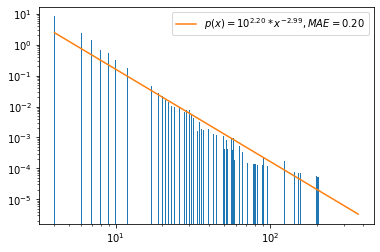

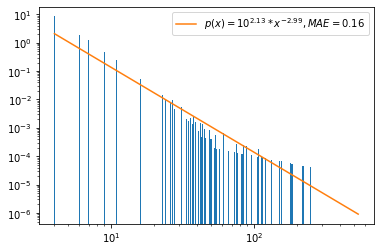

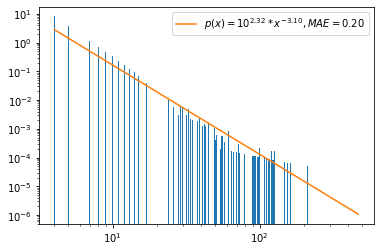

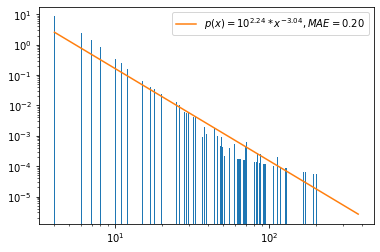

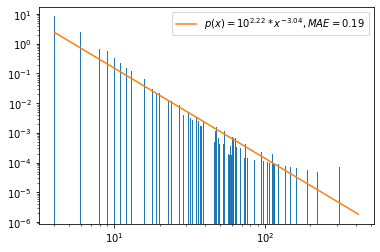

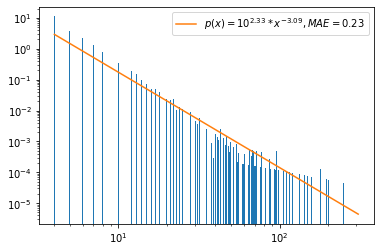

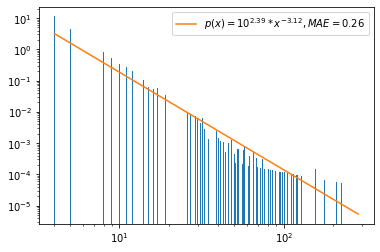

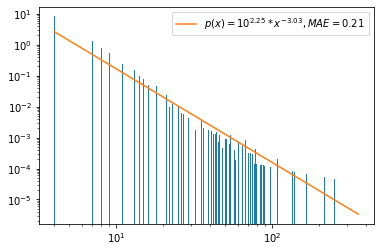

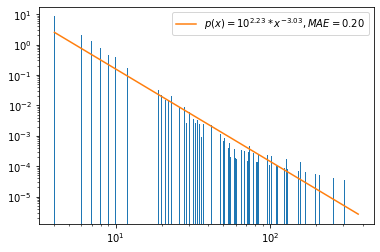

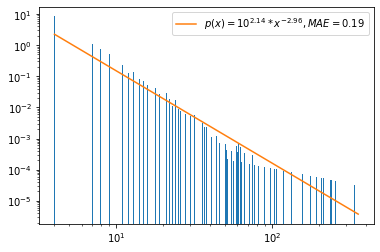

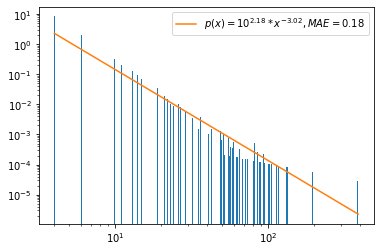

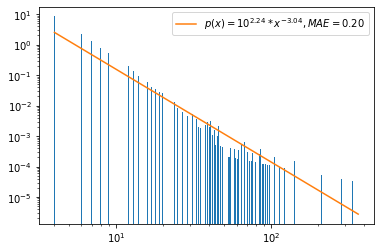

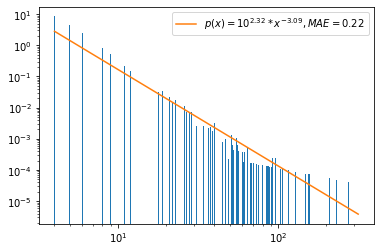

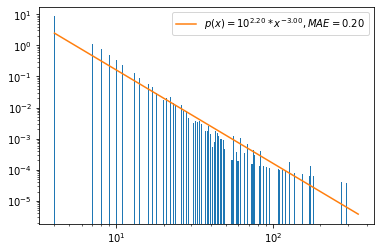

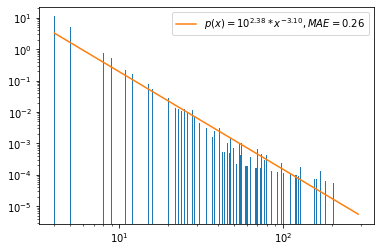

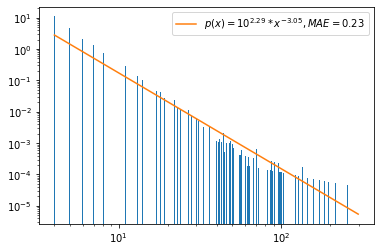

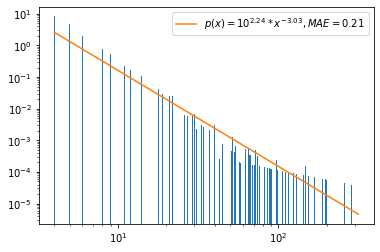

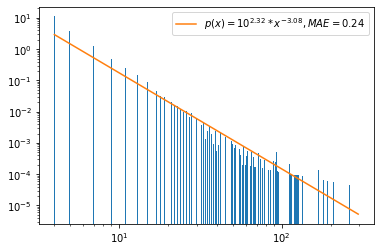

In [1253]:
a_lst=[]
mae_ba=[]
t=0
while t!=30:
    t+=1
    g=nx.barabasi_albert_graph(10000,4)
    degree=dict(g.degree())
    degree_=[degree[i] for i in range(len(degree))]

    bins=np.round(np.logspace(np.log10(min(degree_)),np.log10(max(degree_)),endpoint=True,num=500),2).tolist()
    y=plt.hist(degree_, bins=bins, density=True)
    x_=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    a,b=least(x_,y[0])
    a_lst.append(a)
    pred=predict(a,b,x_)
    mae_ba.append(mean_absolute_error(y[0],pred))
    plt.plot(x_, pred, label=r"$p(x)=10^{%.2f}*x^{%.2f},MAE=%.2f$"%(b,a,mean_absolute_error(y[0],pred)))
    #plt.plot(x_, pred, label="p(x)=10^%.2f*x^%.2f"%(b,a))
    #plt.hist(degree_)
    plt.legend()

    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [1254]:
a_=pd.DataFrame(data={"a":a_lst, "mae":mae_ba})
a_['a']=a_['a']*-1

In [1257]:
print(a_['a'].std(),a_['a'].mean())

0.058158062361575745 3.0349643801994763


In [1258]:
print(a_['mae'].std(),a_['mae'].mean())

0.029535031763147656 0.20682678604825525


In [575]:
# 각국이 (70년대, 80년대, 90년대* sitc4 첫글자(0~9))몇개의 나라에 수출하였는지 기입하기
country_df70=df70[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()
country_df80=df80[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()
country_df90=df90[["year","icode","ecode","sitc4_f"]].groupby(['year',"ecode","sitc4_f"])["icode"].nunique().reset_index()

# 컬럼이름 바꿔주기, ecode가 수출한 국가(icode)의 수를 out_degree로 표기
country_df70.columns=["year","ecode","sitc4_f","out_degree"]
country_df80.columns=["year","ecode","sitc4_f","out_degree"]
country_df90.columns=["year","ecode","sitc4_f","out_degree"]

# 리스트 df70_outdegree의 인덱스 번호를 SITC-4 앞자리의 번호로 하여서 분류해놓는다. 
Df70_outdegree=[country_df70.loc[country_df70["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
Df80_outdegree=[country_df80.loc[country_df80["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]
Df90_outdegree=[country_df90.loc[country_df90["sitc4_f"]=="%d"%i].copy() for i in range(0,10)]

# 각국의 10년 간 수출국 수의 평균을 구한다. 
df70_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df70_outdegree]
df80_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df80_outdegree]
df90_avg_out=[df[["ecode","out_degree"]].groupby(["ecode"]).agg(decade_avg).reset_index() for df in df90_outdegree]

,year,icode,ecode,sitc4,value,sitc4_f
0,1970,117100,138180,0620,1,0
9,1970,117100,164040,0564,1,0
15,1970,117100,164540,0542,391,0
16,1970,117100,164540,0711,107,0
17,1970,117100,164540,0721,3,0


In [771]:
D70=[df70.loc[df70["sitc4_f"]=="%d"%im,["year","icode","ecode"]] for im in range(0,10)]
D80=[df80.loc[df80["sitc4_f"]=="%d"%im,["year","icode","ecode"]] for im in range(0,10)]
D90=[df90.loc[df90["sitc4_f"]=="%d"%im,["year","icode","ecode"]] for im in range(0,10)]

D=[pd.concat([D70[i],D80[i],D90[i]],axis=0).reset_index(drop=True) for i in range(0,10)]# 상품별로 묶기
D=[D[i].groupby(["year","ecode"])["icode"].nunique().reset_index() for i in range(0,10)]
# 상품별 각각 수출 거래량 


In [777]:
#매년 각국의 수출국가수 집계 C[상품번호][연도]
C=[[D[j].loc[D[j]["year"]==i] for i in range(1970,2000)] for j in range(0,10)]

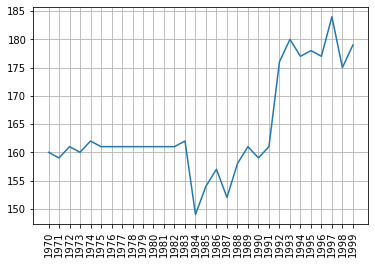

In [801]:
count_=[i.shape[0] for i in C[6]]
# count_는 년도별로 수출을 한 국가가 몇개인지 집계한다.
plt.plot(count_)
plt.xticks(np.arange(0,30),D[0].year.unique(),rotation=90)
plt.grid()
plt.show()

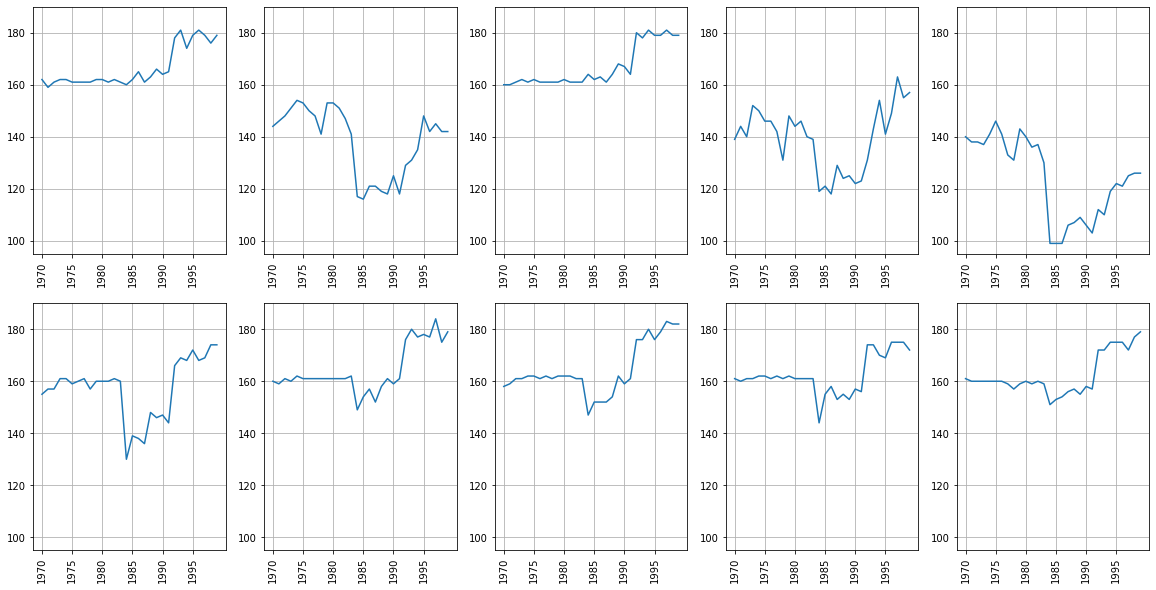

In [1025]:
plt.figure(figsize=(20,10))
for im in range(0,10): # 상품 번호
    plt.subplot(2,5,im+1)

    count_=[i.shape[0] for i in C[im]]
    # count_는 년도별로 수출을 한 국가가 몇개인지 집계한다.
    plt.plot(count_)
    plt.xticks(np.arange(0,30,5),np.arange(1970,2000,5),rotation=90)
    plt.ylim(95, 190)
    plt.grid()
plt.show()

In [804]:
for k in range(0,10):
    for i,j in zip(range(0,30),range(1970,2000)):
        C[k][i].columns=['year', 'ecode', 'icode%d'%j]

In [815]:
DF_=[0 for i in range(0,10)]
for k in range(0,10):
    DF_[k]=pd.merge(C[k][0][["ecode","icode1970"]],C[k][1][["ecode","icode1971"]],how="outer",on="ecode")
    for i in range(2,30):
        DF_[k]=pd.merge(DF_[k],C[k][i][["ecode","icode%d"%(1970+i)]],how="outer",on="ecode")

In [822]:
cols_=[DF_[i]["ecode"] for i in range(0,10)]

In [831]:
DF_1=[DF_[i].T for i in range(0,10)]

In [834]:
for i in range(0,10):
    DF_1[i].columns=cols_[i]
    DF_1[i]=DF_1[i].iloc[[i for i in range(1,31)],:]

In [878]:
DF_[0]

,ecode,icode1970,icode1971,icode1972,icode1973,icode1974,icode1975,icode1976,icode1977,icode1978,...,icode1990,icode1991,icode1992,icode1993,icode1994,icode1995,icode1996,icode1997,icode1998,icode1999
0,117100,66.0,56.0,57.0,64.0,67.0,63.0,60.0,55.0,39.0,...,38.0,40.0,66.0,76.0,85.0,94.0,99.0,96.0,103.0,98.0
1,130120,39.0,44.0,36.0,34.0,38.0,46.0,37.0,37.0,35.0,...,10.0,10.0,13.0,11.0,12.0,13.0,16.0,15.0,13.0,8.0
2,134340,6.0,10.0,13.0,7.0,9.0,10.0,8.0,8.0,11.0,...,14.0,11.0,5.0,3.0,3.0,3.0,3.0,9.0,3.0,3.0
3,135040,112.0,105.0,104.0,110.0,101.0,105.0,97.0,95.0,90.0,...,67.0,66.0,68.0,72.0,78.0,89.0,92.0,86.0,86.0,90.0
4,137360,29.0,30.0,35.0,46.0,39.0,37.0,27.0,26.0,20.0,...,14.0,14.0,14.0,18.0,14.0,16.0,15.0,16.0,11.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,464170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,1.0,4.0,4.0,5.0,4.0,4.0
192,582030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,69.0,63.0,78.0,77.0,76.0,74.0,78.0
193,598070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.0,22.0,21.0,25.0,20.0,18.0,21.0
194,467620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,2.0,3.0


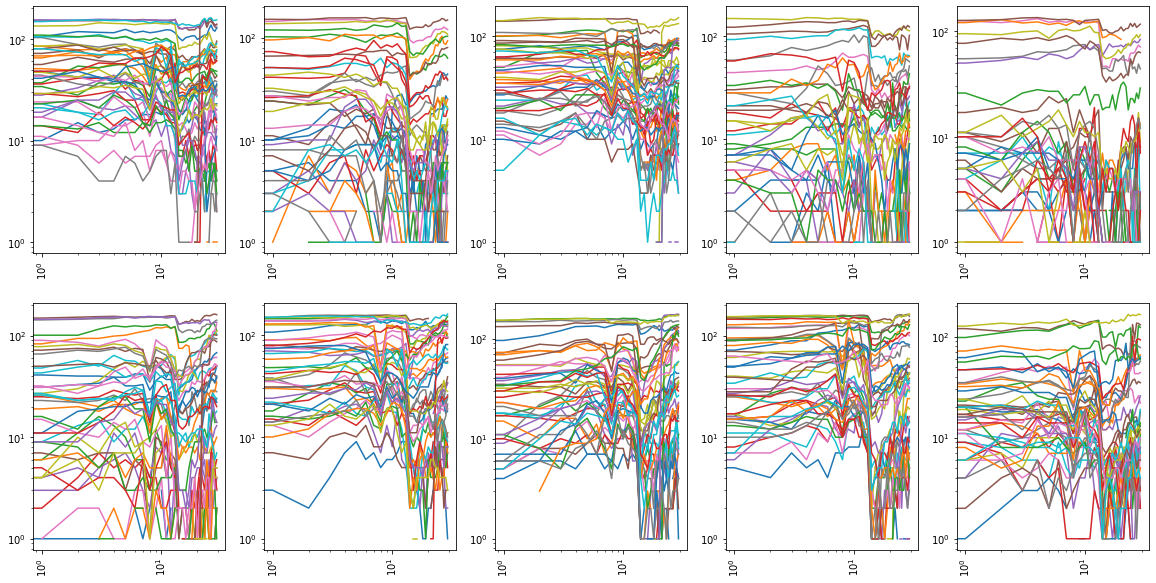

In [1070]:
#pd=6
plt.figure(figsize=(20,10))
for p in range(0,10):
    random.seed(1)
    rand=random.sample(range(1,DF_1[p].shape[1]),50)

    plt.subplot(2,5,p+1)
    #plt.plot(DF_1[p])
    plt.plot(DF_1[p].iloc[:,rand])
    #plt.xticks(DF_1[p].index,np.arange(0,30),rotation=90)
    #plt.xlim(10,30)
    plt.xticks(rotation=90)
    plt.xscale("log")
    plt.yscale("log")
    
plt.show()

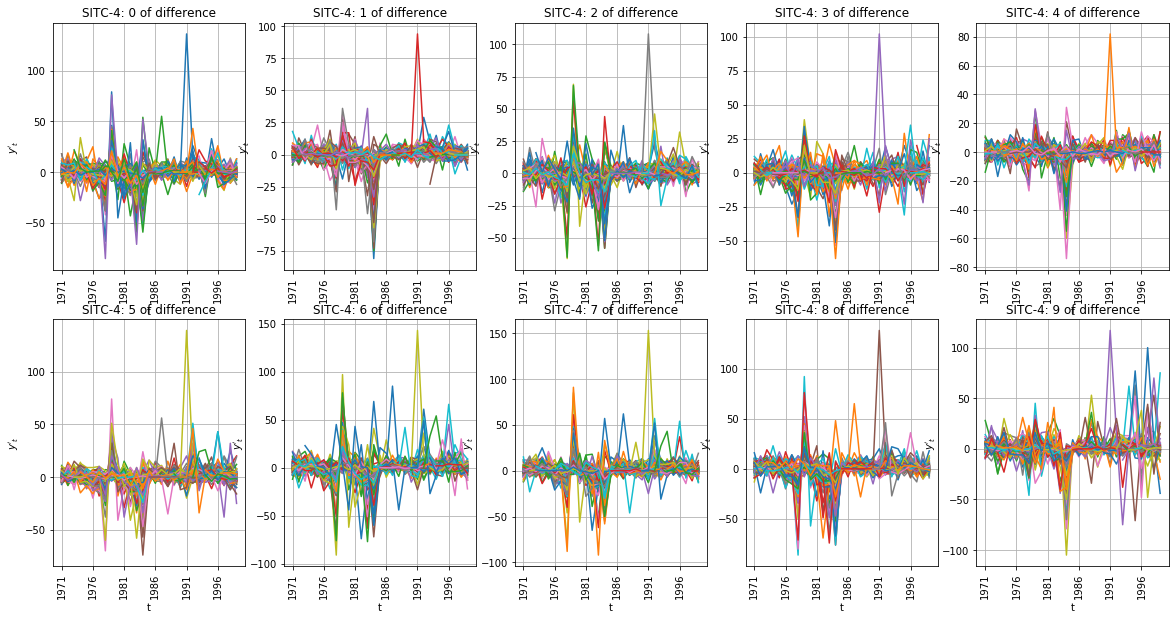

In [1343]:
dff=[]
plt.figure(figsize=(20,10))
for p in range(0,10):
    df_=pd.DataFrame(data={"diff1970":DF_[p]["icode1971"]-DF_[p]["icode1970"]})
    for i in range(1971,2000):
        df_["diff%s"%str(i-1)]=DF_[p]["icode%s"%str(i)]-DF_[p]["icode%s"%str(i-1)]

    DF=df_.T
    DF.columns=DF_[p]["ecode"].copy()
    DF=DF.reset_index(drop=True)
    #random.seed(1)
    #rand=random.sample(range(1,DF.shape[1]),100)
    plt.subplot(2,5,p+1)
    #plt.plot(DF.iloc[:,rand])#linewidth=1)
    
    plt.plot(DF)
    plt.title("SITC-4: %d of difference"%p)
    plt.ylabel("$y'_{t}$")
    plt.xlabel("t")
    plt.grid()
    plt.xticks(np.arange(0, 30,5), np.arange(1971, 2000,5), rotation=90)
    dff.append(DF)
plt.show()

In [933]:
dffT=[]
for i in range(0,10):
    m=dff[i].T
    m.columns=["diff_%s"%i for i in range(1971,2000)]
    dffT.append(m)
    

In [1057]:
m=[]
n=[]
for k in range(0,10):
    for i in range(1971,2000):
        if len(dffT[k].loc[dffT[k]["diff_%s"%i]>25].index.tolist())>15:
            m.append((k,i,dffT[k].loc[dffT[k]["diff_%s"%i]>25].index.tolist()))
        elif len(dffT[k].loc[dffT[k]["diff_%s"%i]<-25].index.tolist())>20:
            n.append((k,i,dffT[k].loc[dffT[k]["diff_%s"%i]<-25].index.tolist()))
        else: pass

In [1065]:
decrease_=pd.DataFrame(n)
decrease_.columns=["sitc4","year","country"]
decrease_["count"]=decrease_["country"].map(lambda x: len(x))

In [1243]:
dffT[0].loc[dffT[0]["diff_1991"]>100]

,diff_1971,diff_1972,diff_1973,diff_1974,diff_1975,diff_1976,diff_1977,diff_1978,diff_1979,diff_1980,...,diff_1990,diff_1991,diff_1992,diff_1993,diff_1994,diff_1995,diff_1996,diff_1997,diff_1998,diff_1999
ecode,,,,,,,,,,,,,,,,,,,,,
532760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,136.0,14.0,6.0,-16.0,17.0,-2.0,-12.0,-7.0,1.0


In [1245]:
country90[532760]

'Germany'

In [1067]:
decrease_

,sitc4,year,country,count
0,0,1984,"[163840, 338580, 343400, 413760, 413920, 44196...",22
1,1,1984,"[211240, 330760, 357800, 413760, 413920, 44196...",23
2,2,1984,"[163840, 413920, 447920, 451440, 453440, 45764...",22
3,5,1984,"[163840, 211240, 330760, 365900, 413920, 44196...",23
4,6,1984,"[163840, 211240, 338580, 357800, 365900, 41376...",25
5,7,1984,"[163840, 330760, 331700, 357800, 413760, 44196...",26
6,8,1984,"[163840, 211240, 330760, 331700, 357800, 41376...",30
7,9,1984,"[163840, 211240, 357800, 413920, 445120, 45344...",21


In [1060]:
increase_=pd.DataFrame(m)
increase_.columns=["sitc4","year","country"]

In [1062]:
increase_["count"]=increase_["country"].map(lambda x: len(x))

In [1063]:
increase_.head()

,sitc4,year,country,count
0,0,1979,"[164500, 166860, 168340, 331700, 332180, 33604...",16
1,5,1979,"[166860, 331700, 334840, 336040, 338620, 34188...",16
2,6,1979,"[117100, 331700, 334840, 336040, 338580, 36590...",21
3,7,1979,"[331700, 334840, 365900, 444140, 446820, 45356...",18
4,8,1979,"[137880, 331700, 336040, 365900, 444140, 44682...",19


In [987]:
country90[446820]

'Saudi Arabia'

`Time evolution